## EDA ON FINANCIAL CREDIT

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

 - Approved: The Company has approved loan Application

 - Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

 - Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

 - Unused offer:  Loan has been cancelled by the client but on different stages of the process.

### Business Objectives

If a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

### Importing the neccessary packages

In [2]:
#import the required packages

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the datasets from application_data.csv and previous_application.csv

appl_data = pd.read_csv("application_data.csv")

prev_appl = pd.read_csv("previous_application.csv")

### Inspection of data

In [5]:
#print the first few rows of application data using head

appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#print the first few rows of previous application data using head

prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Comments:

Above two imported datasets have more number of columns and most of the columns not shown in head comment

In [7]:
#Shape of the datasets

print("Applicaton dataset:", appl_data.shape)

print('Previous application dataset:', prev_appl.shape)

Applicaton dataset: (307511, 122)
Previous application dataset: (1670214, 37)


##### Comments:

- Application dataset contains **307511 rows** and **122 features**
- Previous application dataset contains **1670214** rows **37 features**

In [8]:
appl_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

##### Comments:

By looking into the info of these two datasets, we can see there are many columns having null values.

### Handling missing data

At first, I will look into application dataset for the null values then will handle it accordingly.

In [10]:
(appl_data.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

***Find the features having null values more than 50%***

In [11]:
null_feat_perc = (appl_data.isnull().mean()*100).sort_values(ascending=False)

print(null_feat_perc[null_feat_perc.values > 50])

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [12]:
print("No. of features with missing values more than 50% is:", len(null_feat_perc[null_feat_perc.values > 50]))

No. of features with missing values more than 50% is: 41


***We can drop these features as they are about the building where the client lives or the car age that client have. These features may not be relevant for our current analysis. So we can drop them***

In [13]:
null_feat = null_feat_perc[null_feat_perc.values > 50]

In [14]:
#Drop the 41 features with missing values more than 50%

appl_data.drop(null_feat.index, axis=1, inplace=True)

In [15]:
#check the shape of the application dataframe

appl_data.shape

(307511, 81)

In [16]:
#check the missing value percentage again

(appl_data.isnull().mean()*100).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
                                  ...    
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
SK_ID_CURR                       0.000000
Length: 81, dtype: float64

Still some of the features significant number of null values.

##### Find the features with null values more than 35%

In [17]:
null_feat_perc = (appl_data.isnull().mean()*100).sort_values(ascending=False)

null_feat_perc[null_feat_perc > 35]

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

In [18]:
print("No. of features with missing values more than 35% is:", len(null_feat_perc[null_feat_perc.values > 35]))

No. of features with missing values more than 35% is: 8


***These 8 features also related to building where the client lives. These features looks not relevant for our analysis. So we can drop them***

In [19]:
null_feat = null_feat_perc[null_feat_perc.values > 35]

In [20]:
#Drop the 8 features with missing values more than 35%

appl_data.drop(null_feat.index, axis=1, inplace=True)

In [21]:
#check the shape of the application dataframe again

appl_data.shape

(307511, 73)

In [22]:
#check the missing value percentage again

null_feat_perc = (appl_data.isnull().mean()*100).sort_values(ascending=False)

null_feat_perc[null_feat_perc > 0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [23]:
print('Still we see', len(null_feat_perc[null_feat_perc > 0]),'features are having null values')

Still we see 18 features are having null values


### Impute missing values

We can analyze one by one of the above 17 features

In [24]:
#check these 18 columns if they are continous or categorical variable

def check_cat_cont(col):
    return appl_data[col].value_counts()

for col in null_feat_perc[null_feat_perc > 0].index:
    print(check_cat_cont(col))
    print('\n')
#Based on below this variable in continous

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.013948       1
0.014148       1
0.017506       1
0.020455       1
0.028275       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
1

Out of 18 missing variables, only below 4 variables are continous numeric columns

- EXT_SOURCE_3
- EXT_SOURCE_2
- AMT_GOODS_PRICE
- AMT_ANNUITY


In [25]:
#Impute column EXT_SOURCE_3 with median value

appl_data.EXT_SOURCE_3.fillna(appl_data.EXT_SOURCE_3.median(), inplace=True)

In [26]:
#Verify again the missing values in EXT_SOURCE_3

appl_data.EXT_SOURCE_3.isnull().sum()

0

In [27]:
#Impute column EXT_SOURCE_2 with median value

appl_data.EXT_SOURCE_2.fillna(appl_data.EXT_SOURCE_2.median(), inplace=True)

In [28]:
#Verify again the missing values in EXT_SOURCE_2

appl_data.EXT_SOURCE_2.isnull().sum()

0

In [29]:
#Impute column AMT_GOODS_PRICE with median value

appl_data.AMT_GOODS_PRICE.fillna(appl_data.AMT_GOODS_PRICE.median(), inplace=True)

In [30]:
#Verify again the missing values in AMT_GOODS_PRICE

appl_data.AMT_GOODS_PRICE.isnull().sum()

0

In [31]:
#Impute column AMT_ANNUITY with median value

appl_data.AMT_ANNUITY.fillna(appl_data.AMT_ANNUITY.median(), inplace=True)

In [32]:
#Verify again the missing values in AMT_ANNUITY

appl_data.AMT_ANNUITY.isnull().sum()

0

Impute remaining missing number variables with mode

In [33]:
#impute 14 columns with mode value

null_feat_perc = (appl_data.isnull().mean()*100).sort_values(ascending=False)

In [34]:
for col in null_feat_perc[null_feat_perc > 0].index:
    appl_data[col].fillna(appl_data[col].mode()[0], inplace=True)

In [35]:
#check the dataframe for null values again

(appl_data.isnull().mean()*100).sort_values(ascending=False)

SK_ID_CURR                    0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_CONT_MOBILE              0.0
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64

##### Comments

Missing values in the dataset is imputed now

In [36]:
#looking into distribution of categorical columns

cat_col = appl_data.select_dtypes(exclude=np.number).columns

for col in cat_col:
    print(appl_data[col].value_counts())
    print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

In [37]:
#CODE_GENDER have some entries with XNA which may be Not available so we will update it to most frequent value

appl_data.loc[appl_data.CODE_GENDER == 'XNA','CODE_GENDER'] ='F'

In [38]:
appl_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [39]:
#ORGANIZATION_TYPE feature have lot of XNA values. Lets impute them.

appl_data[appl_data.ORGANIZATION_TYPE == 'XNA'][['ORGANIZATION_TYPE','OCCUPATION_TYPE']].groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).size()

ORGANIZATION_TYPE  OCCUPATION_TYPE
XNA                Cleaning staff         2
                   Laborers           55372
dtype: int64

From above we understand that many of the laborers haven't provided the type of organization they work. As there are lot of organization, imputing may not be required at this time. So I am not imputing it.



### Handling Outliers

In [40]:
#Get the list of all numeric variable to find outliers if any

appl_data.select_dtypes(include=np.number).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

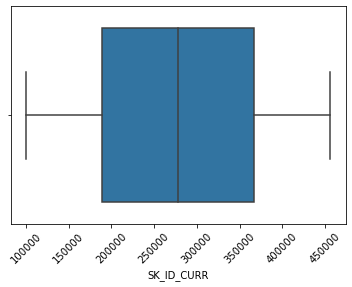

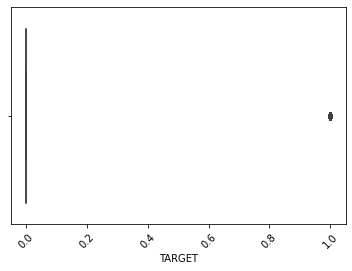

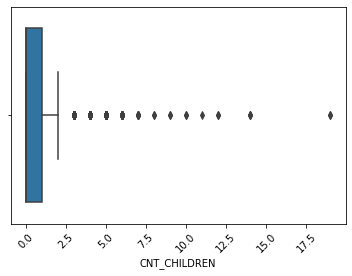

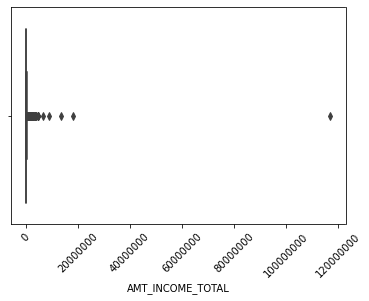

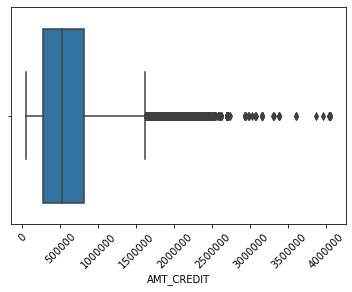

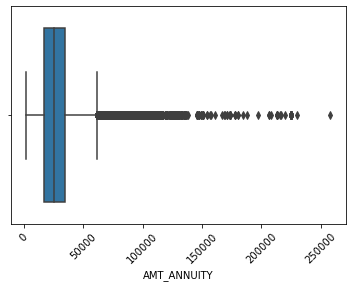

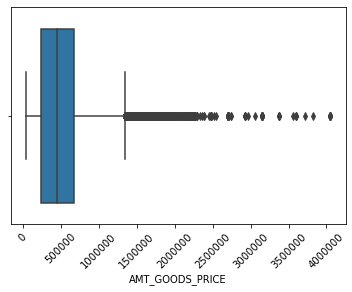

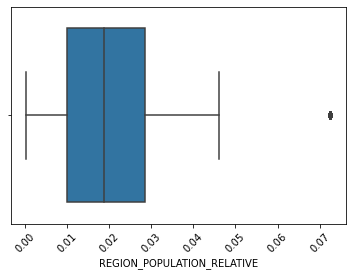

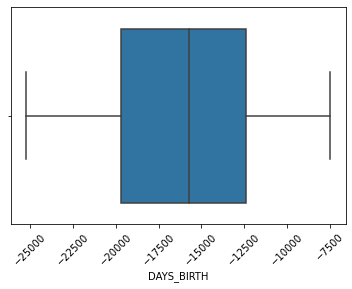

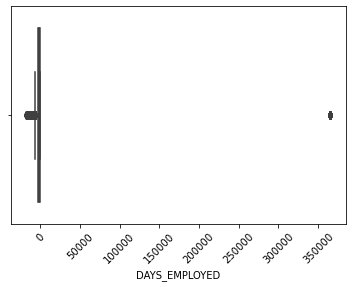

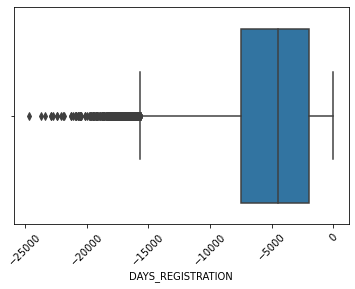

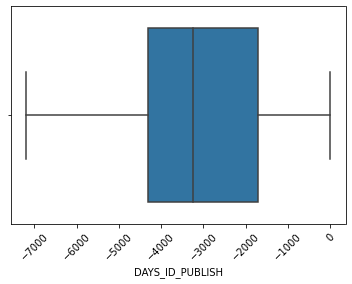

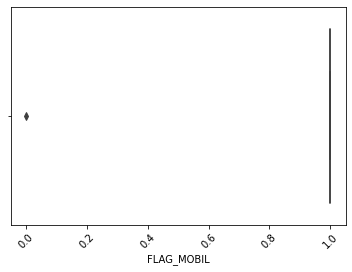

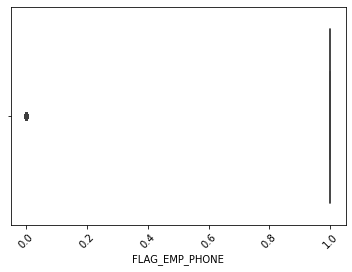

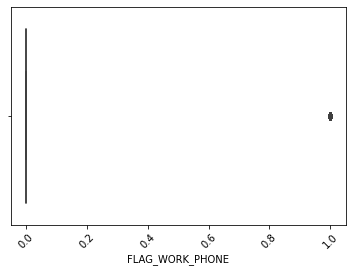

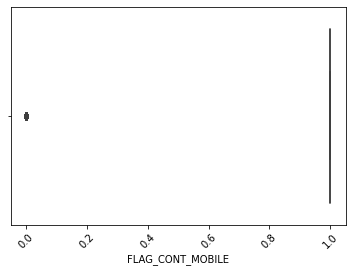

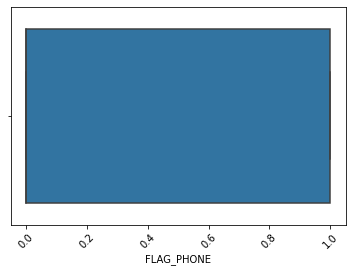

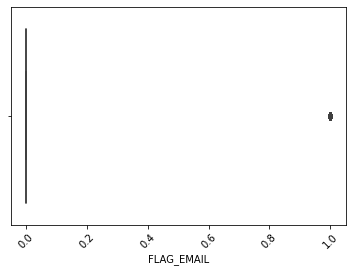

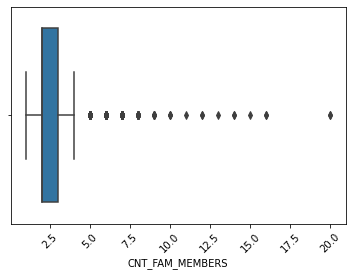

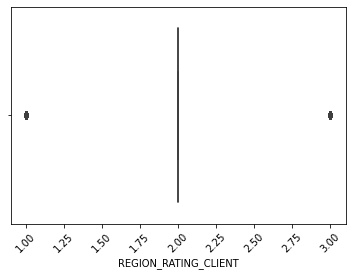

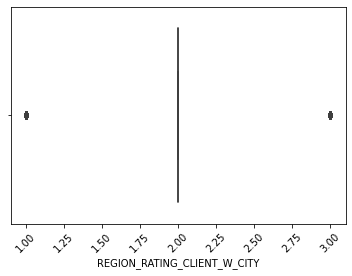

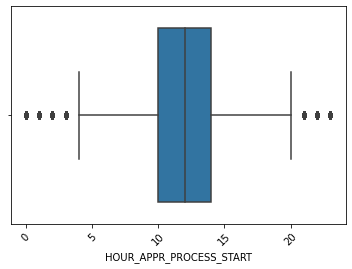

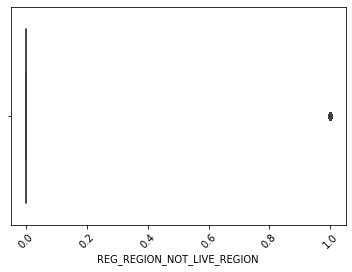

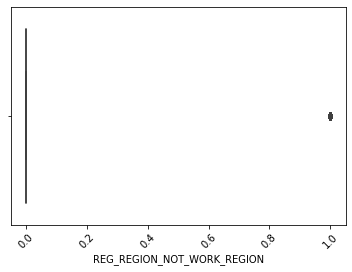

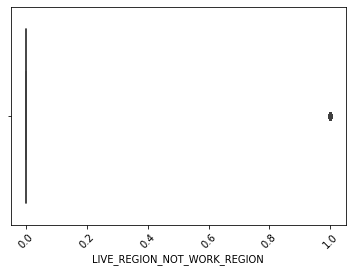

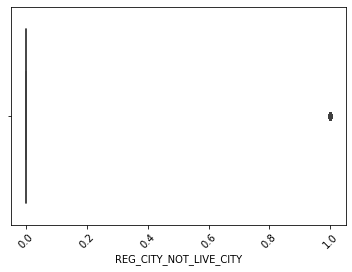

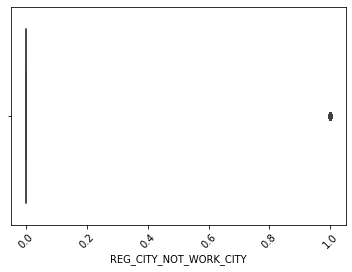

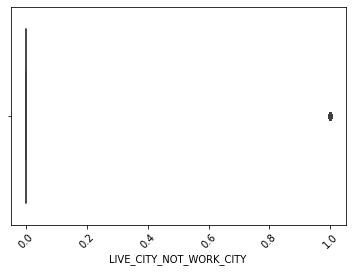

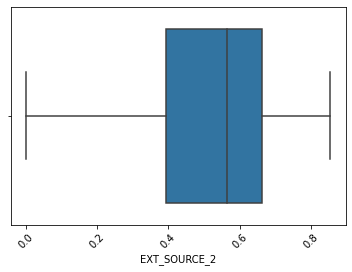

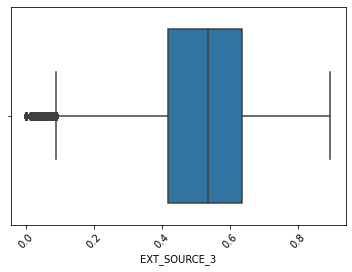

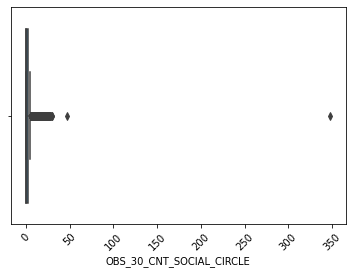

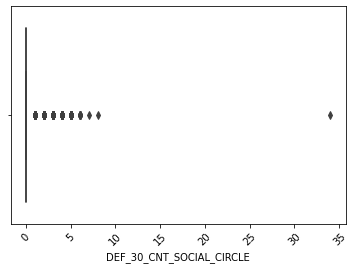

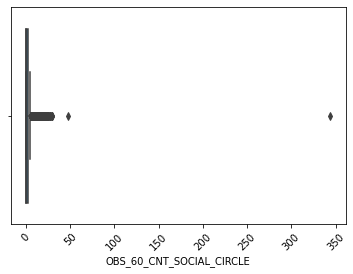

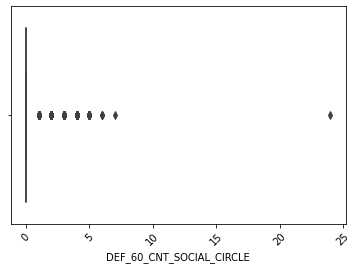

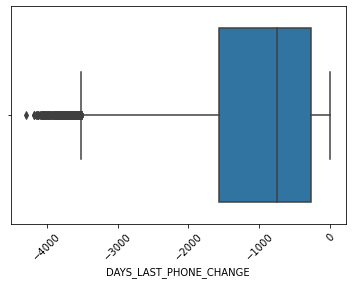

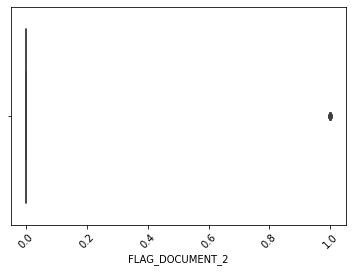

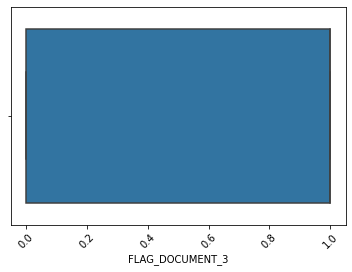

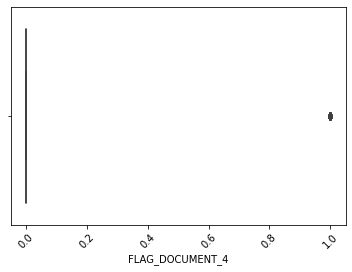

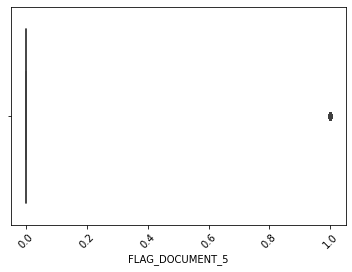

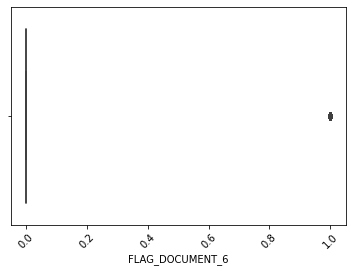

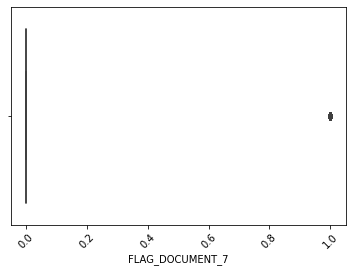

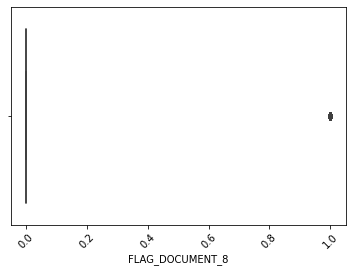

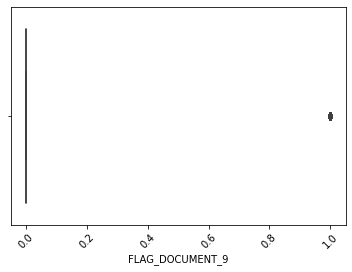

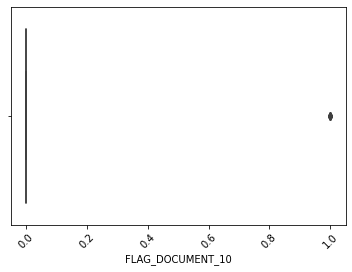

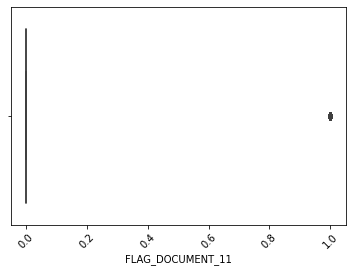

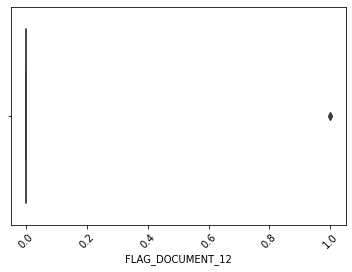

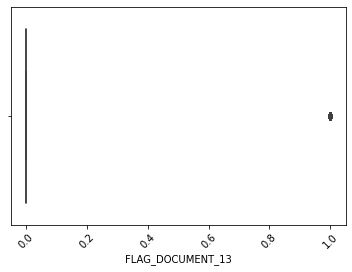

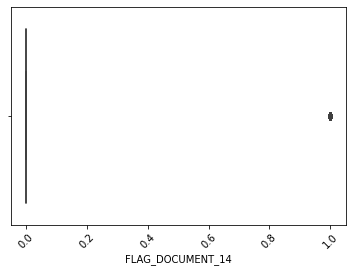

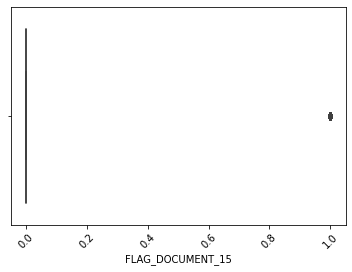

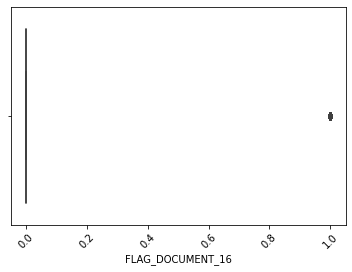

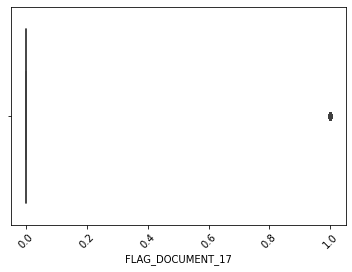

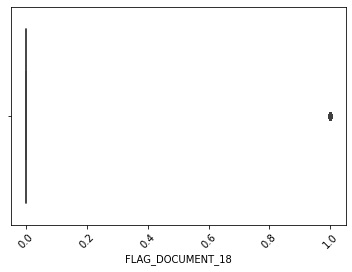

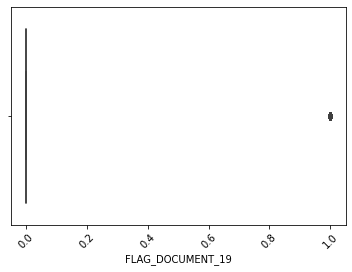

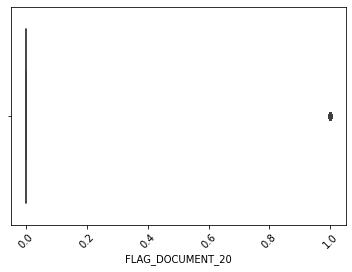

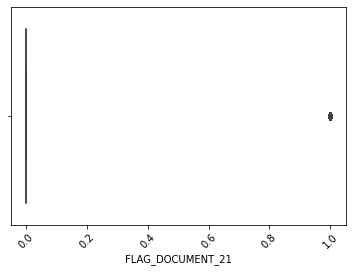

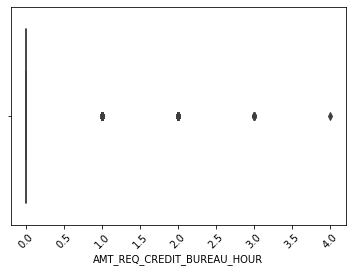

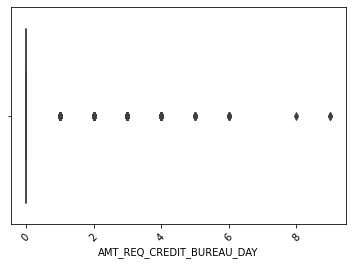

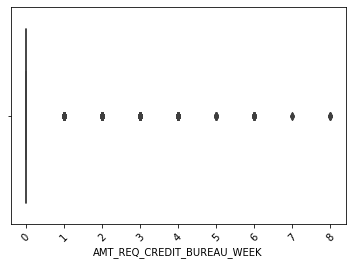

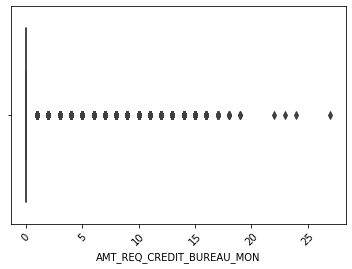

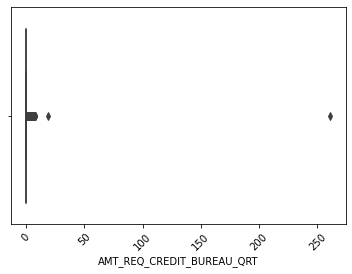

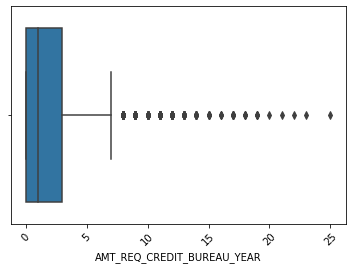

In [41]:
#Identify the outliers for few important columns for our analysis

for col in appl_data.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(appl_data[col])
    plt.ticklabel_format(style = 'plain', axis='x') #to prevent income or similar variable to not showing in exp format in label
    plt.xticks(rotation=45)

##### Comments:

Below are noticed upon observing the boxplot of few numeric columns:

 - ***CNT_CHILDREN*** have some outliers that if clients have more than 2 children. Also see that till 14(approx) the outliers are continous and one outlier which is approximately equal to 19 is not seems correct
 - ***AMT_INCOME_TOTAL*** showing many outliers as there are incomes in Millions. First few outliers looks continous and one extreme income outlier is 120M.
 - ***AMT_CREDIT*** the loan amount credit more than 17lakhs are shown as outliers. Till 27Lakhs, the outliers looks continous and the rest seems exceptional.
 - ***AMT_ANNUITY*** there are many outliers and till 140 thousands the outliers look continous. Extreme is 260 thousands.
 - ***AMT_GOODS_PRICE*** have many outliers. Till 25lakhs it looks continous.
 - ***DAYS_EMPLOYED*** shows some negative outliers and one extreme outlier is in 370 thousands.
 - ***FALG_MOBIL, FLAG_EMP_PHONE*** some of clients didn't provided personal or work mobile as it shows as outlier.
 - ***FLAG_WORK_PHONE*** only few provided home phone, as it shows outlier
 - ***FLAG_EMAIL*** most of the clients didn't provided email so it shows as outlier
 - ***CNT_FAM_MEMBERS*** there are some continous outliers and one extreme outliers. Most of the clients have 4 family members
 - ***HOUR_APPR_PROCESS_START*** some of the clients apply the loan even in early morning 12 to 4 AM or after 8 PM so they are shown as outliers
 - ***DAYS_LAST_PHONE_CHANGE*** it shows the clients who haven't changed the phone for long days as outlier
 - ***FLAG_DOCUMENT_1 to 21*** clients only FLAG_DOCUMENT_3 as it equally distributed other documents most of the clients haven't provided

We can bin the few numeric variables for better visualization

In [42]:
appl_data.select_dtypes(include=np.number).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [43]:
appl_data.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f'))

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [44]:
#Bining total income into five based on values

b = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,120000000]
l = ['0-50000', '50000-100000', "100000-150000", '150000-200000', '200000-250000','250000-300000','300000-350000',
        '350000-400000','400000-450000','450000-500000','500000 and more']

appl_data['INCOME_TYPE'] = pd.cut(appl_data.AMT_INCOME_TOTAL, bins=b, labels = l)

In [45]:
appl_data.INCOME_TYPE.value_counts()

100000-150000      91591
150000-200000      64307
50000-100000       59181
200000-250000      48137
250000-300000      17039
300000-350000       8874
350000-400000       5802
400000-450000       4924
0-50000             4517
500000 and more     2702
450000-500000        437
Name: INCOME_TYPE, dtype: int64

In [46]:
#Binning AMT_CREDIT variable into

appl_data.AMT_CREDIT.describe().apply(lambda x: format(x, 'f'))

count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

In [47]:
np.quantile(appl_data.AMT_CREDIT,0.90)

1133748.0

In [48]:
b = [0,0.25,0.5,0.75,0.9,1]
l = ['0-270000', '270000-520000', "520000-850000", '850000-1200000','1200000 and more']

appl_data['AMT_CREDIT_TYPE'] = pd.qcut(appl_data.AMT_CREDIT, q=b, labels = l)

In [49]:
appl_data.AMT_CREDIT_TYPE.value_counts()

0-270000            78421
520000-850000       77786
270000-520000       75428
850000-1200000      45283
1200000 and more    30593
Name: AMT_CREDIT_TYPE, dtype: int64

In [50]:
#By DAYS_BIRTH we can bin age of the clients into group

appl_data['CLIENT_AGE'] = abs(appl_data.DAYS_BIRTH/365).astype(int)

In [51]:
appl_data.CLIENT_AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: CLIENT_AGE, dtype: float64

In [52]:
b = [0,20,30,40,50,60,70]
l = ['0-20','20-30','30-40','40-50','50-60','60-70']

appl_data['CLIENT_AGE_TYPE'] = pd.cut(appl_data.CLIENT_AGE, bins=b, labels = l)

In [53]:
appl_data['CLIENT_AGE_TYPE'].value_counts()

30-40    83117
40-50    74401
50-60    67819
20-30    52805
60-70    29368
0-20         1
Name: CLIENT_AGE_TYPE, dtype: int64

### Data Imbalance check

We have TARGET  column where:
 - 1 denotes clients with payment difficulties
 - 0 denotes others

In [54]:
appl_data['TARGET'].value_counts().values

array([282686,  24825], dtype=int64)

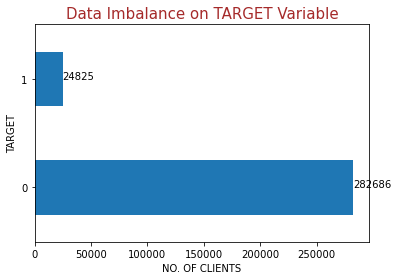

In [55]:
#Data imbalance check for TARGET variable using bar plot

plt.figure(figsize=(6,4))
appl_data['TARGET'].value_counts().plot.barh()
plt.title('Data Imbalance on TARGET Variable',fontdict={'fontsize': 15,'color':'Brown'})
plt.xlabel('NO. OF CLIENTS')
plt.ylabel('TARGET')

for index, value in enumerate(appl_data['TARGET'].value_counts().values):
    plt.text(value, index,str(value))

plt.show()

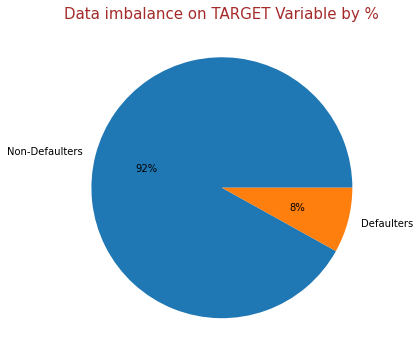

In [56]:
#Data imbalance check for TARGET variable  using pie chart

plt.figure(figsize=(8,6))

labels = ['Non-Defaulters','Defaulters']

Target_perc = appl_data.TARGET.value_counts(normalize=True)*100

Target_perc.plot.pie(labels=labels,autopct='%1.0f%%',fontsize=10)
plt.title('Data imbalance on TARGET Variable by %',fontdict={'fontsize': 15,'color':'Brown'})
plt.ylabel("")
plt.show()

In [57]:
non_def_count = appl_data['TARGET'].value_counts()[0]
def_count = appl_data['TARGET'].value_counts()[1]

print('Ratio of Data imbalance in TARGET variable is:', round(non_def_count/def_count,1))

Ratio of Data imbalance in TARGET variable is: 11.4


##### Comments:

From above bar and pie charts, it is clear that defaulters are less as compared to non-defaulters. There is data imbalance and the ratio is 11.4

### Univariate Analysis

Below are univariate analysis of few columns

In [58]:
#NAME_CONTRACT_TYPE variable

appl_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

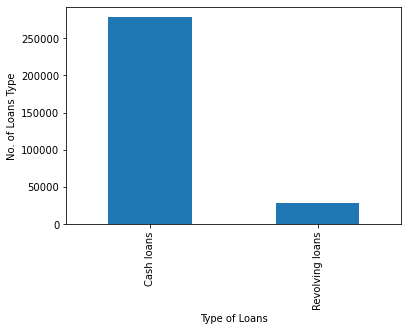

In [59]:
appl_data.NAME_CONTRACT_TYPE.value_counts().plot.bar()

plt.xlabel('Type of Loans')
plt.ylabel('No. of Loans Type')
plt.show()

Most of the loans are Cash loans

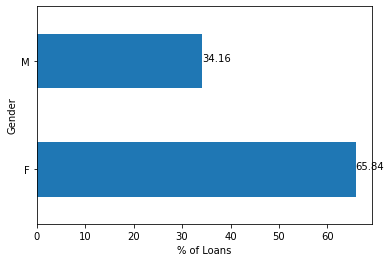

In [60]:
#CODE_GENDER variable

gender_perc = appl_data.CODE_GENDER.value_counts(normalize=True)*100

gender_perc.plot.barh()

plt.xlabel('% of Loans')
plt.ylabel('Gender')

for index, value in enumerate(gender_perc.values):
    plt.text(value, index,str(round(value,2)))

plt.show()

% of Female loan applicants are almost twice of Male applicants

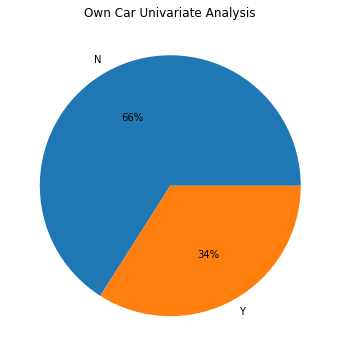

In [61]:
#FLAG_OWN_CAR variable

plt.figure(figsize=(8,6))

own_car_perc = appl_data.FLAG_OWN_CAR.value_counts()

own_car_perc.plot.pie(autopct='%1.0f%%',fontsize=10)
plt.title('Own Car Univariate Analysis')
plt.ylabel("")
plt.show()

Only 34% of the applicants have own car

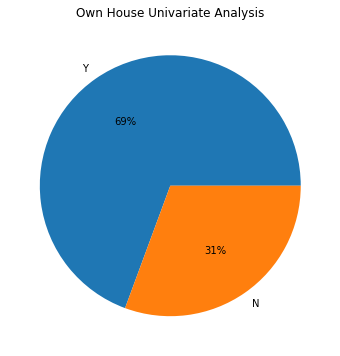

In [62]:
#FLAG_OWN_REALTY variable

plt.figure(figsize=(8,6))

own_hs_perc = appl_data.FLAG_OWN_REALTY.value_counts()

own_hs_perc.plot.pie(autopct='%1.0f%%',fontsize=10)
plt.title('Own House Univariate Analysis')
plt.ylabel("")
plt.show()

Most of the clients do have own house or flat.

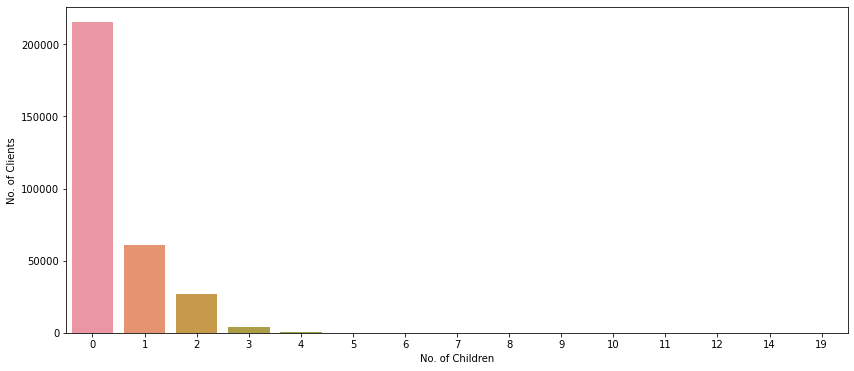

In [63]:
#CNT_CHILDREN variable

plt.figure(figsize=(14,6))
sns.countplot(appl_data.CNT_CHILDREN)
plt.xlabel('No. of Children')
plt.ylabel('No. of Clients')
plt.show()

It looks most of the applicants do not have children. Few have 1 and very few have 2 or 3.

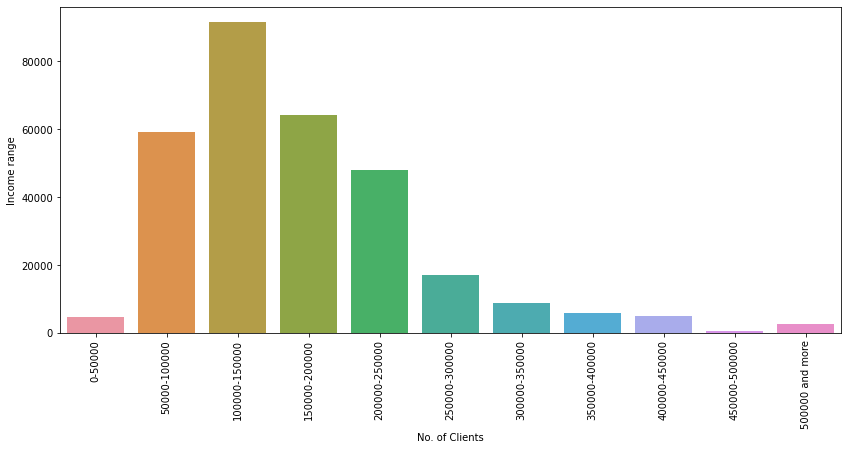

In [64]:
#AMT_INCOME_TOTAL variable - we can use our binned varibale INCOME_TYPE
plt.figure(figsize=(14,6))
#appl_data.INCOME_TYPE.value_counts().plot.barh()
sns.countplot(appl_data.INCOME_TYPE)
plt.xlabel('No. of Clients')
plt.ylabel('Income range')
plt.xticks(rotation=90)
plt.show()

As we see, the highest number of clients fall in income range from 100000 to 150000

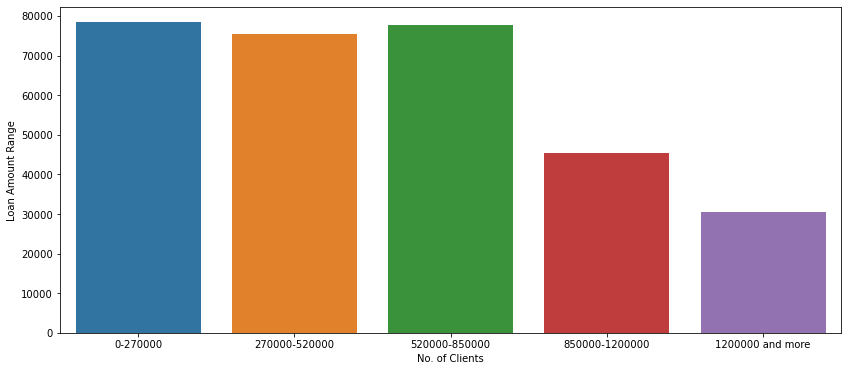

In [65]:
#AMT_CREDIT variable - we can use binned variable AMT_CREDIT_TYPE

plt.figure(figsize=(14,6))
sns.countplot(appl_data.AMT_CREDIT_TYPE)
plt.xlabel('No. of Clients')
plt.ylabel('Loan Amount Range')
plt.show()

Most of the clients received loan amount from 0 to 850000

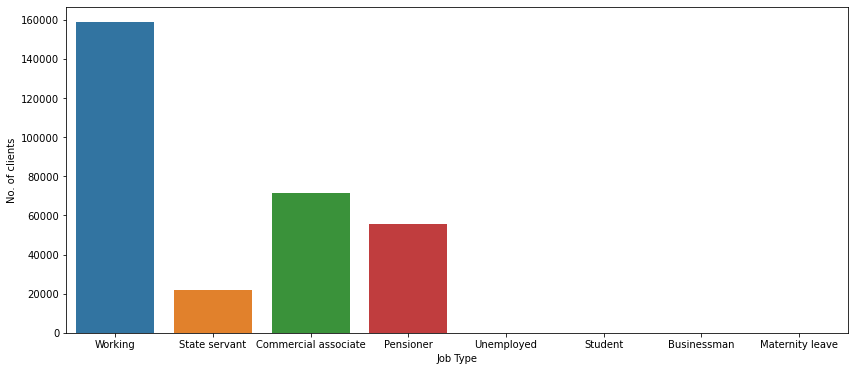

In [66]:
#NAME_INCOME_TYPE variable

plt.figure(figsize=(14,6))
sns.countplot(appl_data.NAME_INCOME_TYPE)
plt.xlabel('Job Type')
plt.ylabel('No. of clients')
plt.show()

Working professionals mostly applied for loans

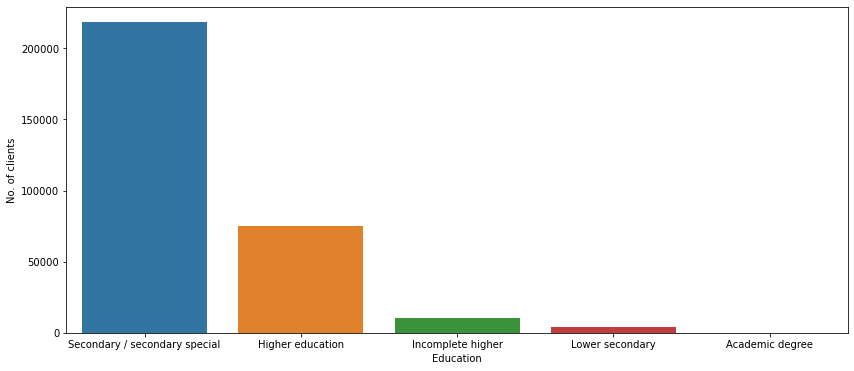

In [67]:
#NAME_EDUCATION_TYPE variable

plt.figure(figsize=(14,6))
sns.countplot(appl_data.NAME_EDUCATION_TYPE)
plt.xlabel('Education')
plt.ylabel('No. of clients')
plt.show()

Loans applied by clients who completed their secondary education are more compared to others

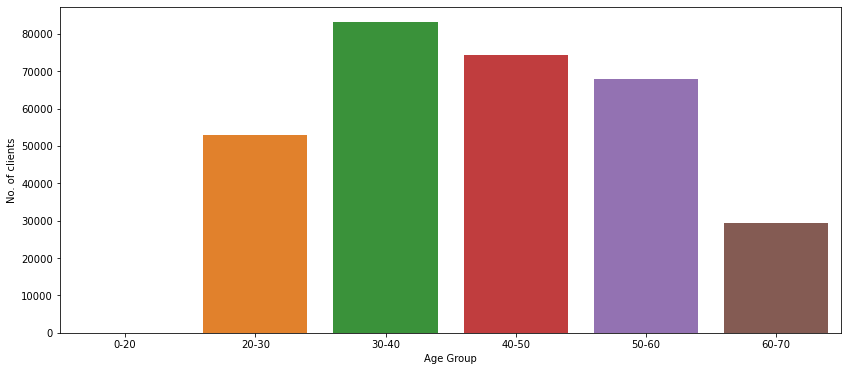

In [177]:
#CLIENT_AGE_TYPE variable
plt.figure(figsize=(14,6))
sns.countplot(appl_data.CLIENT_AGE_TYPE)
plt.xlabel('Age Group')
plt.ylabel('No. of clients')
plt.show()

As seen above, clients within the age group of 30 to 40 applied loans mostly. There is one loan application from the age group 0 to 20.

### Bivariate Analysis

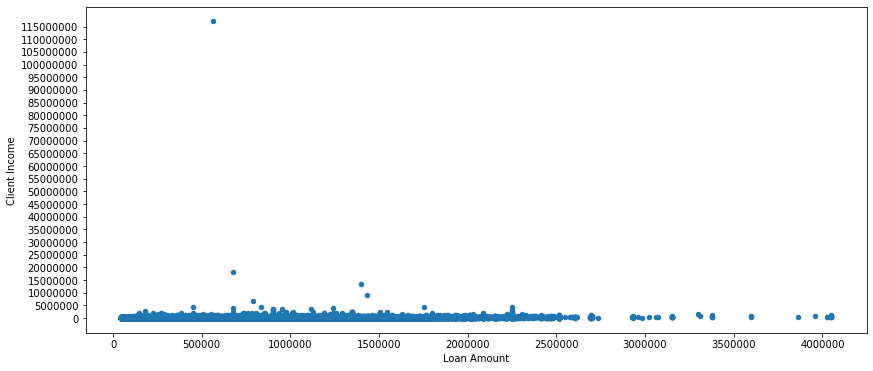

In [69]:
#AMT_INCOME_TOTAL vs AMT_CREDIT

appl_data.plot.scatter('AMT_CREDIT','AMT_INCOME_TOTAL',figsize=(14,6))
plt.xlabel('Loan Amount')
plt.ylabel('Client Income')
plt.yticks(np.arange(0, max(appl_data['AMT_INCOME_TOTAL'])+1, 5000000))
plt.ticklabel_format(style = 'plain')

##### Comments:

Above shows the client below 50 Lakhs got different loan amount upto  40Lakhs. But there are few outliers that who earn higher income got only 6 lakhs (approx) loan only.

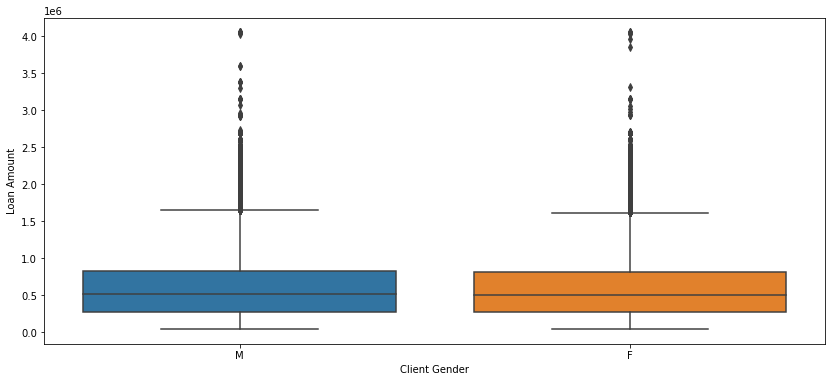

In [70]:
#CODE_GENDER vs AMT_CREDIT

plt.figure(figsize=(14,6))
sns.boxplot(appl_data.CODE_GENDER,appl_data.AMT_CREDIT)
plt.xlabel('Client Gender')
plt.ylabel('Loan Amount')
plt.show()

##### Comments:
It looks there is no big difference between loan amount credited to Male comparing with Female. There are some outliers for Female applicants for higher amount.

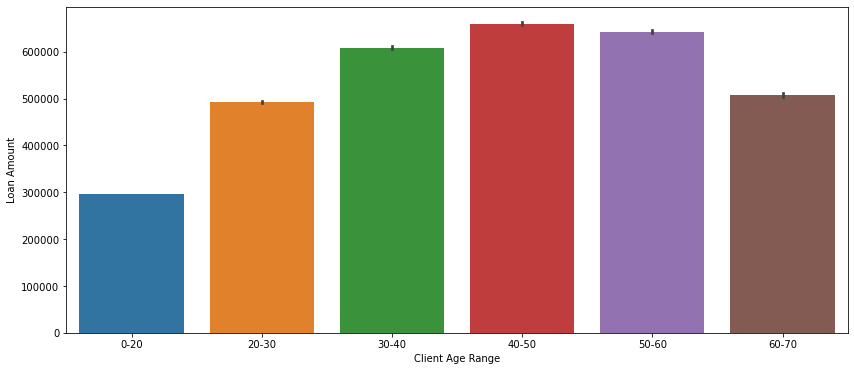

In [71]:
#CLIENT_AGE_TYPE vs AMT_CREDIT

plt.figure(figsize=(14,6))
sns.barplot(appl_data.CLIENT_AGE_TYPE,appl_data.AMT_CREDIT)
plt.xlabel('Client Age Range')
plt.ylabel('Loan Amount')
plt.show()

##### Comments:

It looks higher loan amount is credited to the Age group of 40 to 50. Age group 0-20 got fewer loan amount as they might be studying

### Segmented Univariate Analysis on TARGET Variable

In [72]:
#Categorical variable segemented univariate analysis on TARGET

cat_feat = appl_data.select_dtypes(exclude=np.number).columns

def cat_uni_plot(feat):
    plt.figure(figsize=(14,6))
    sns.countplot(data=appl_data,x='TARGET',hue=feat)
    

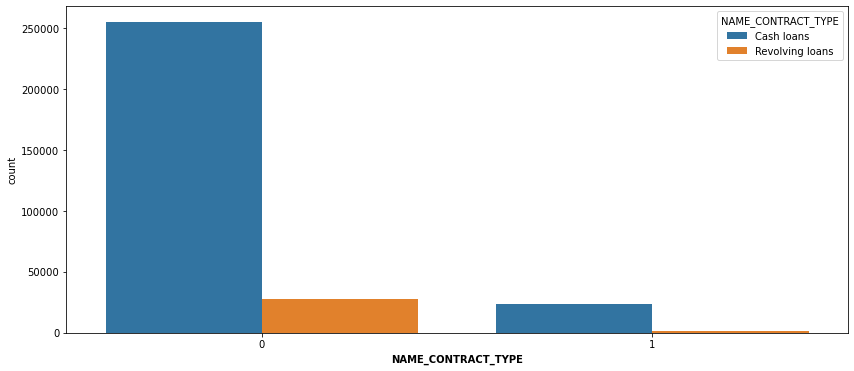

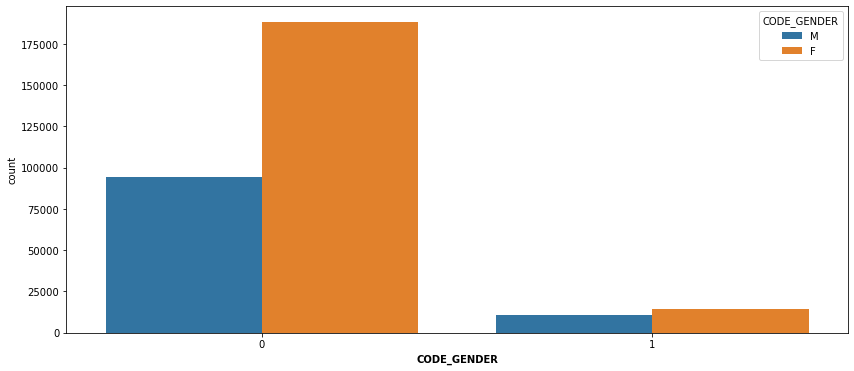

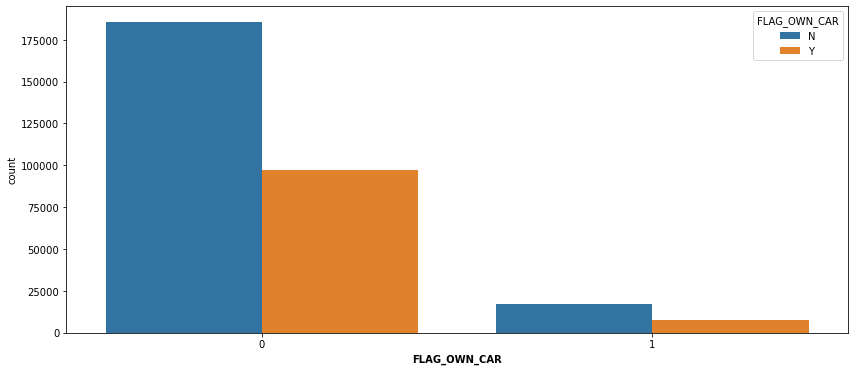

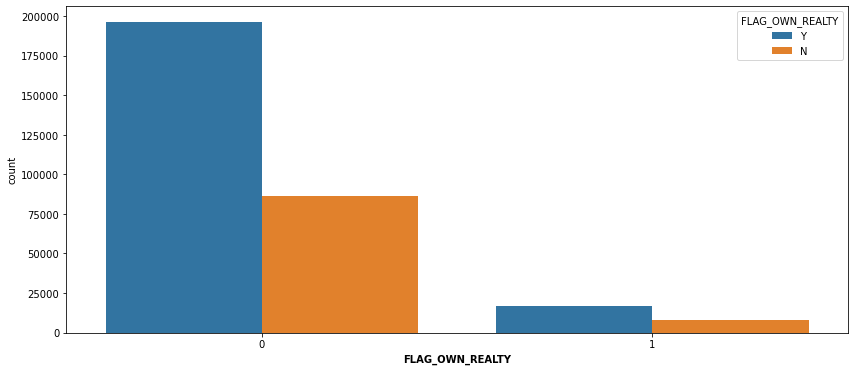

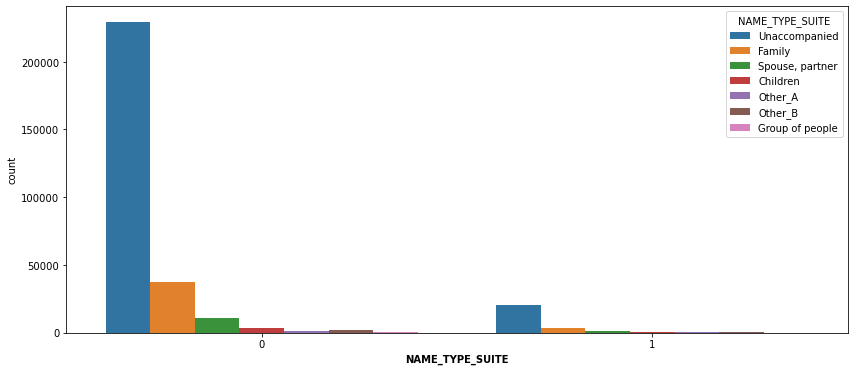

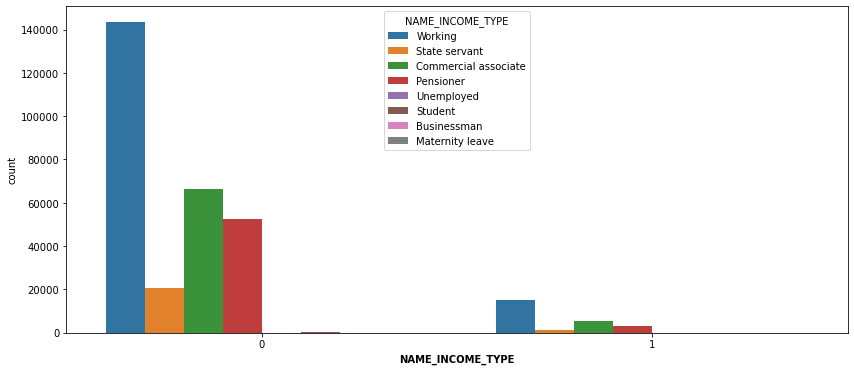

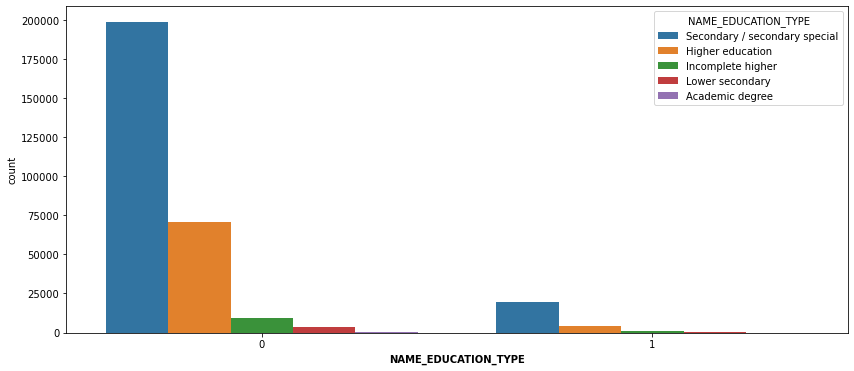

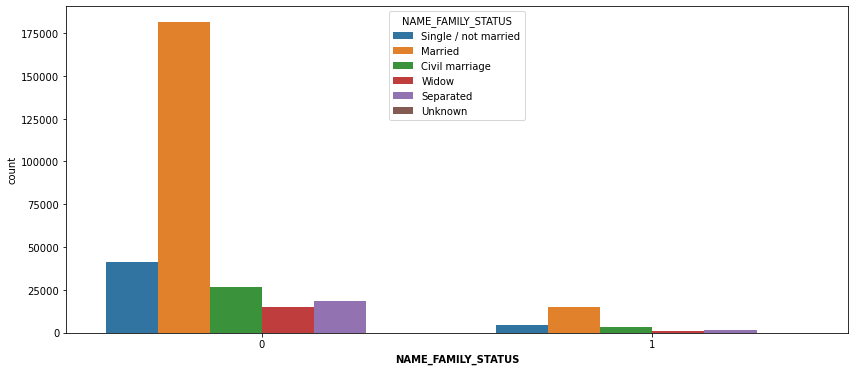

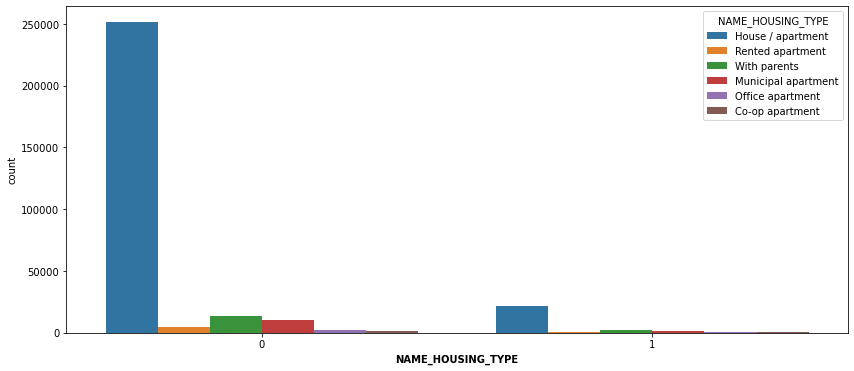

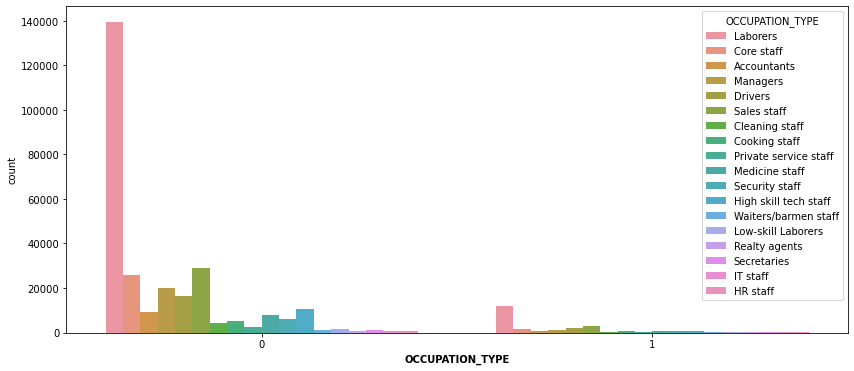

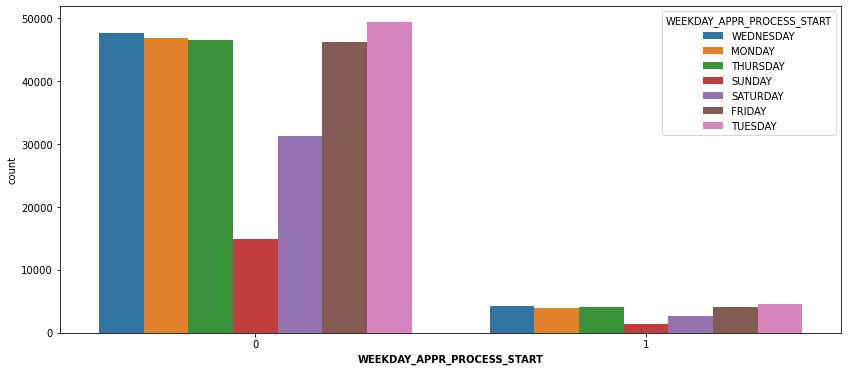

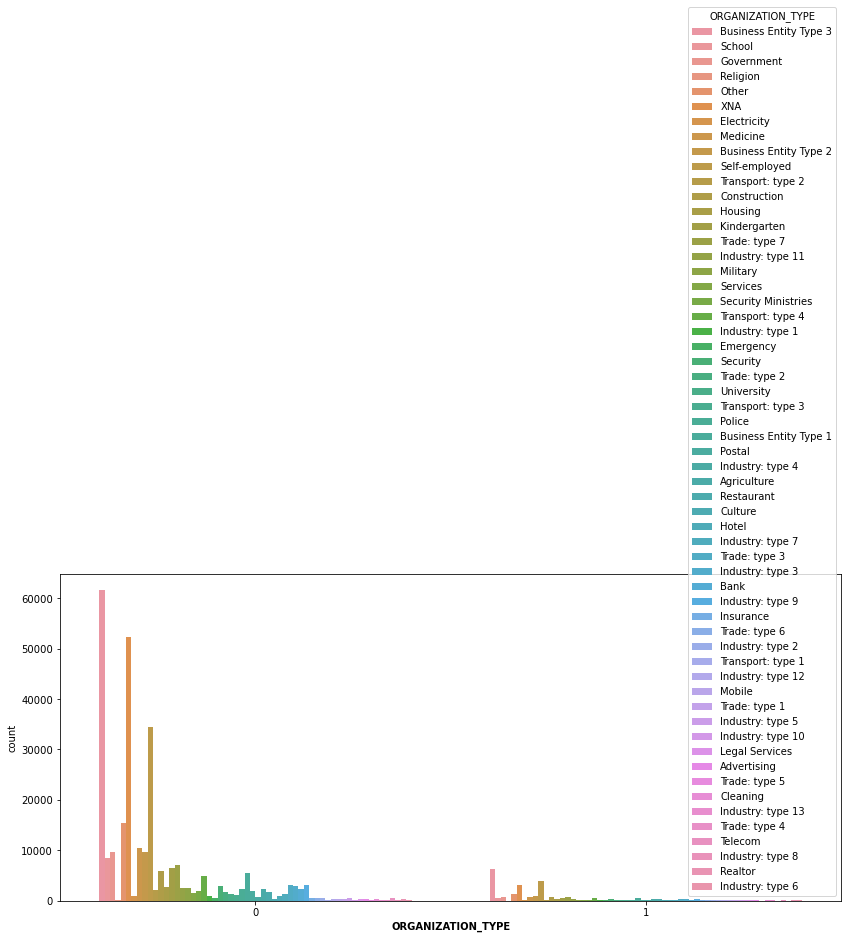

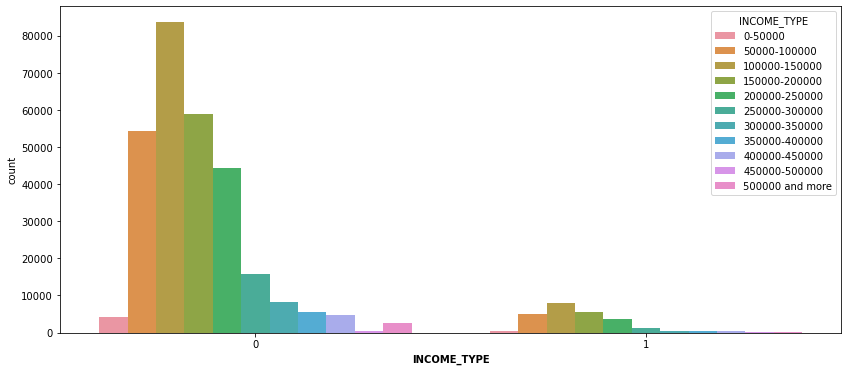

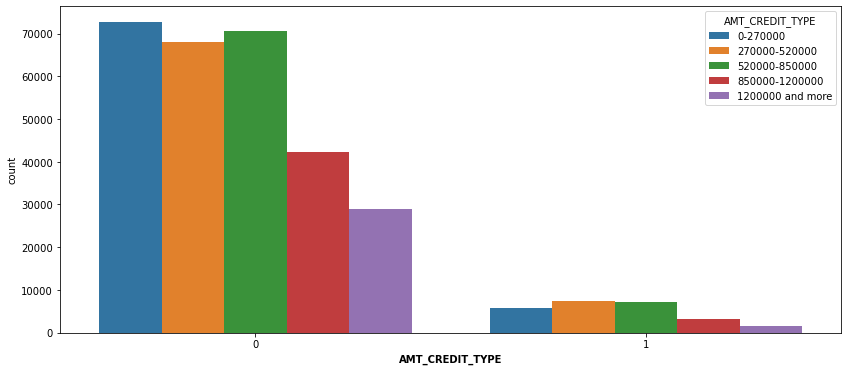

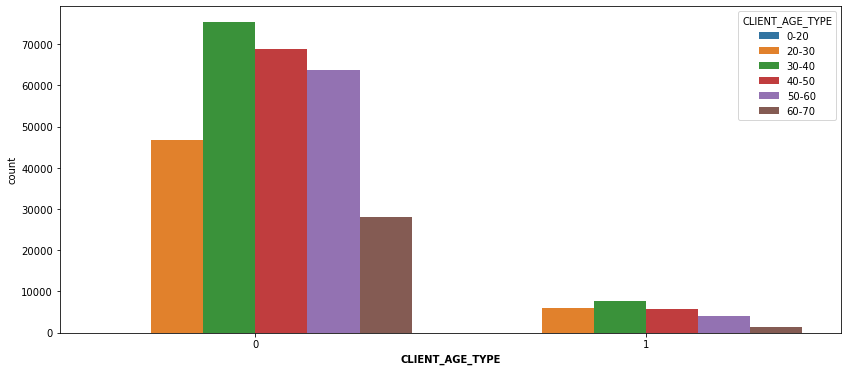

In [73]:
for f in cat_feat:
    cat_uni_plot(f)

##### Comments:

- Cash loans have more defaulters as the number of loans are high
- It looks Female applicants applied more loans compared to Male. Thus the no. of Female applicants is high, they are also high in the defaulters
- Applicants who have own car, house are leading in defaulters and non-defaulters. 
- Unaccompanied, working professionals, secondary education holder applied high number of loans and so they lead in both defaulter as well as non-defaulters.
- Married people have pay the loans as well as sometimes they become defaulter compared to others.
- Applicants who live in own House/Apartments leads in Defaulters as well as non-defaulters. It looks applicants who live in Co-op aparments equally distributed in Defaulters and non-defaulters.
- Laborers who applied more loan become more defaulters. Noticed *Manager who applied more loans are repaying the loan* (less default).
- Most of the application submitted on Tuesday and that is high in default. But may not be practically related with application day and defaults.
- XNA (may be applicants haven't provided the organization type) in Organization type is applied more loans but less in defaults.
- *Clients who earn 500000 or more are less likely to default*.
- Age group 30 to 40 applied more loans and also they facing difficulties in payment. Age group 60-70 having less difficulties and applied less loans compared to others.

In [74]:
#Numerical variable segemented univariate analysis on TARGET

num_feat = appl_data.select_dtypes(include=np.number).columns

def num_uni_plot(feat):
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    sns.distplot(appl_data[appl_data.TARGET==0][feat],kde=False, color='green')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Non-Defaulters', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.distplot(appl_data[appl_data.TARGET==1][feat], kde=False, color='red')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Defaulters', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=90)

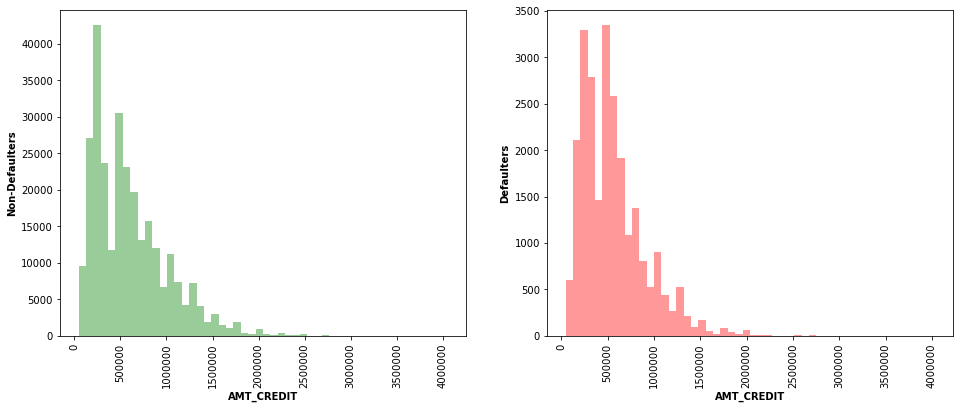

In [75]:
#As there are many numerical variables, I will take only few important variables

#AMT_CREDIT
num_uni_plot('AMT_CREDIT')

##### Comments:
Defaulters are high where loan amount is less than 10 Lakhs. May be it is because of the no. of loans below 10 lakhs is high.

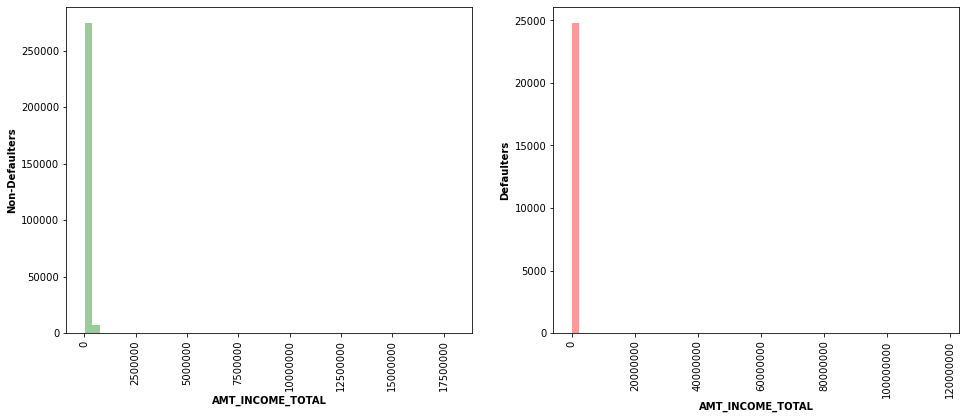

In [76]:
#AMT_INCOME_TOTAL

num_uni_plot('AMT_INCOME_TOTAL')


##### Comments:
Defaulters are mostly less income applicants

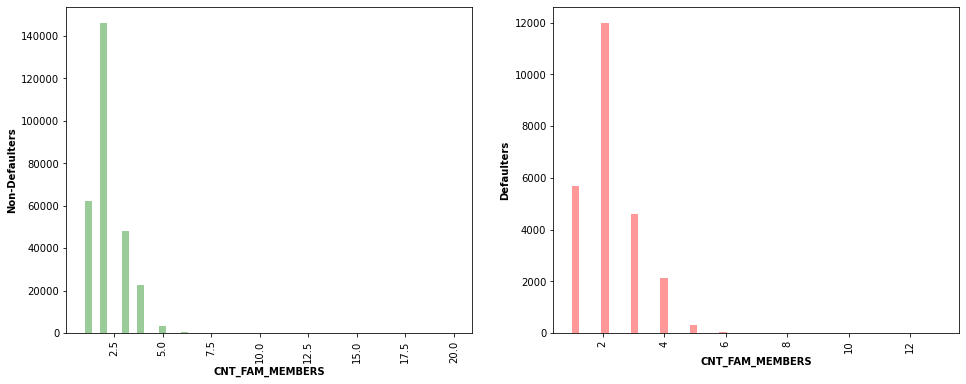

In [77]:
# CNT_FAM_MEMBERS

num_uni_plot('CNT_FAM_MEMBERS')

##### Comments:

Applicants who have less than 2 family members are high in defaulters as well non-defaulters

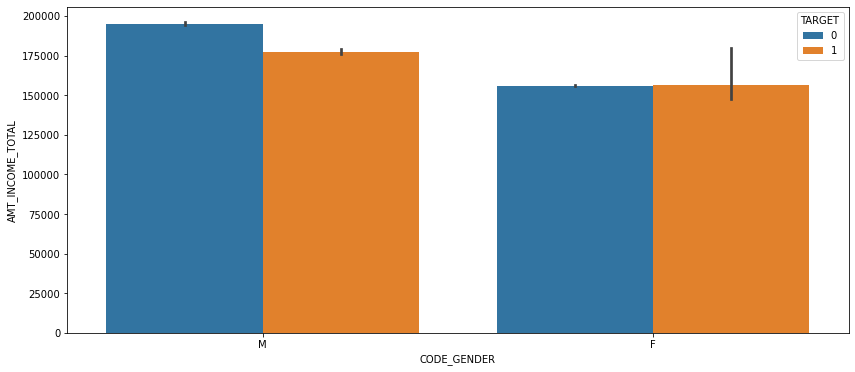

In [78]:
#Cat vs Num on TARGET

#CODE_GENDER vs AMT_INCOME_TOTAL on TARGET
plt.figure(figsize=(14,6))
sns.barplot(data=appl_data,x='CODE_GENDER', y='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

#### Comments:

It is noticed that Female applicants having lesser income than Male applicants. Female applicants defaults and non-defaults are almost same. Male applicants who earn higher than female having higher repaying capability.

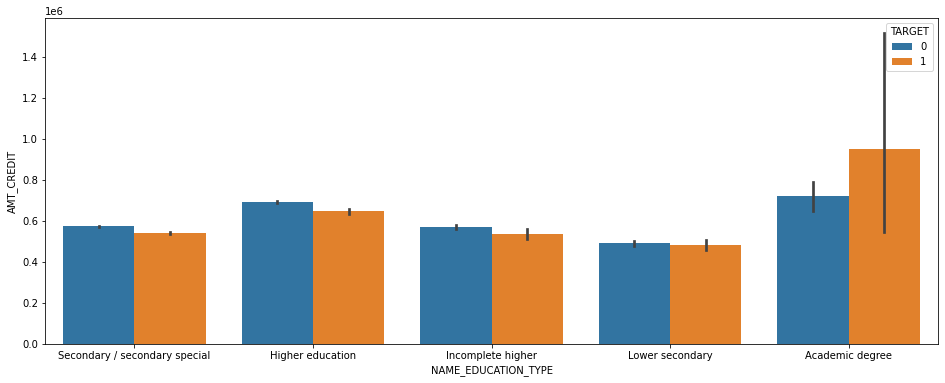

In [79]:
#NAME_EDUCATION_TYPE vs AMT_CREDIT on TARGET

plt.figure(figsize=(16,6))
sns.barplot(data=appl_data,x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',hue='TARGET')
plt.show()

##### Comments:

Acamedic degree holders are likely to defaults high aparts from other education qualifiers.

In [80]:
pd.pivot_table(appl_data,index=['CODE_GENDER','NAME_FAMILY_STATUS'],columns=['CLIENT_AGE_TYPE'],
               values='TARGET')

CLIENT_AGE_TYPE                   0-20     20-30     30-40     40-50  \
CODE_GENDER NAME_FAMILY_STATUS                                         
F           Civil marriage         NaN  0.112718  0.094425  0.078351   
            Married                NaN  0.107381  0.080426  0.061916   
            Separated              NaN  0.103627  0.082985  0.068328   
            Single / not married   0.0  0.100414  0.091110  0.071922   
            Unknown                NaN       NaN  0.000000       NaN   
            Widow                  NaN  0.058140  0.089457  0.060712   
M           Civil marriage         NaN  0.134910  0.144727  0.139112   
            Married                NaN  0.111642  0.096138  0.082322   
            Separated              NaN  0.196544  0.131745  0.115493   
            Single / not married   NaN  0.135166  0.135110  0.134836   
            Unknown                NaN       NaN  0.000000       NaN   
            Widow                  NaN  0.400000  0.166667  0.103030   

CLIENT_AGE_TYPE                      50-60     60-70  
CODE_GENDER NAME_FAMILY_STATUS                        
F           Civil marriage        0.055526  0.054739  
            Married               0.046688  0.041689  
            Separated             0.051053  0.050888  
            Single / not married  0.055584  0.044691  
            Unknown                    NaN       NaN  
            Widow                 0.054407  0.049056  
M           Civil marriage        0.119557  0.074074  
            Married               0.075003  0.058718  
            Separated             0.147095  0.068421  
            Single / not married  0.117452  0.081967  
            Unknown                    NaN       NaN  
            Widow                 0.137838  0.098039

In [81]:
#Cat vs Cat on Target

df = pd.pivot_table(appl_data,index=['CODE_GENDER','NAME_FAMILY_STATUS'],columns=['CLIENT_AGE_TYPE'],
               values='TARGET')

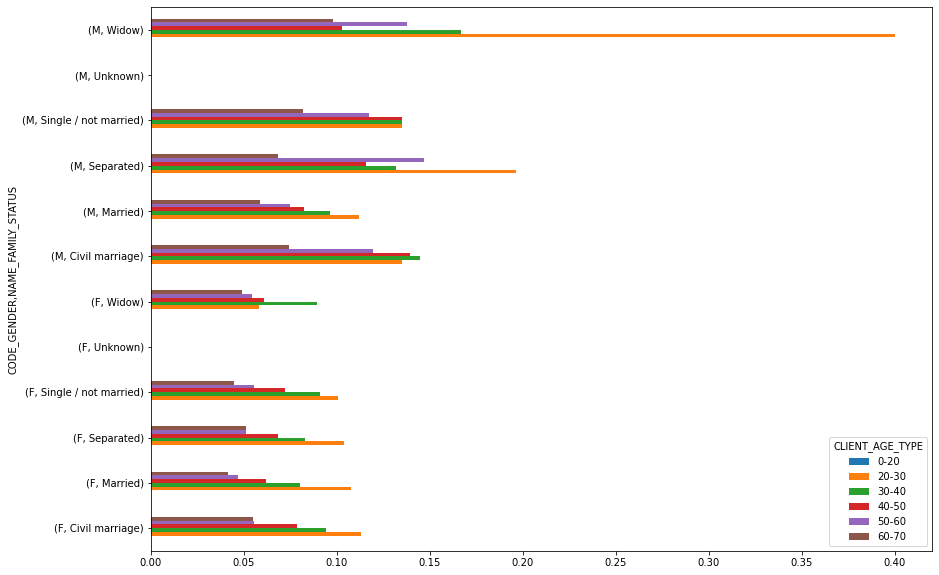

In [82]:
df.plot.barh(figsize=(14,10))
plt.show()

##### Comments:

- Male who are in age range from 20 to 30 and Widow or separated are mostly defaulters.
- Mostly it seems in age group 20 to 30 are defaulters in Female.
- Female in age range from 30 to 40 and Widow are also likely to default.

### Co-relation between variables

In [83]:
non_def = appl_data.loc[appl_data["TARGET"]==0] 
defaulters = appl_data.loc[appl_data["TARGET"]==1]

In [84]:
non_def_c = non_def.drop(['SK_ID_CURR','TARGET','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','DAYS_BIRTH','DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],axis=1)
defaulters_c = defaulters.drop(['SK_ID_CURR','TARGET','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','DAYS_BIRTH','DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],axis=1)

In [85]:
corr_non_def = non_def_c.corr(method='spearman')

In [86]:
def corr_heat(data,title):
    plt.figure(figsize=(14, 10))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 50

    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

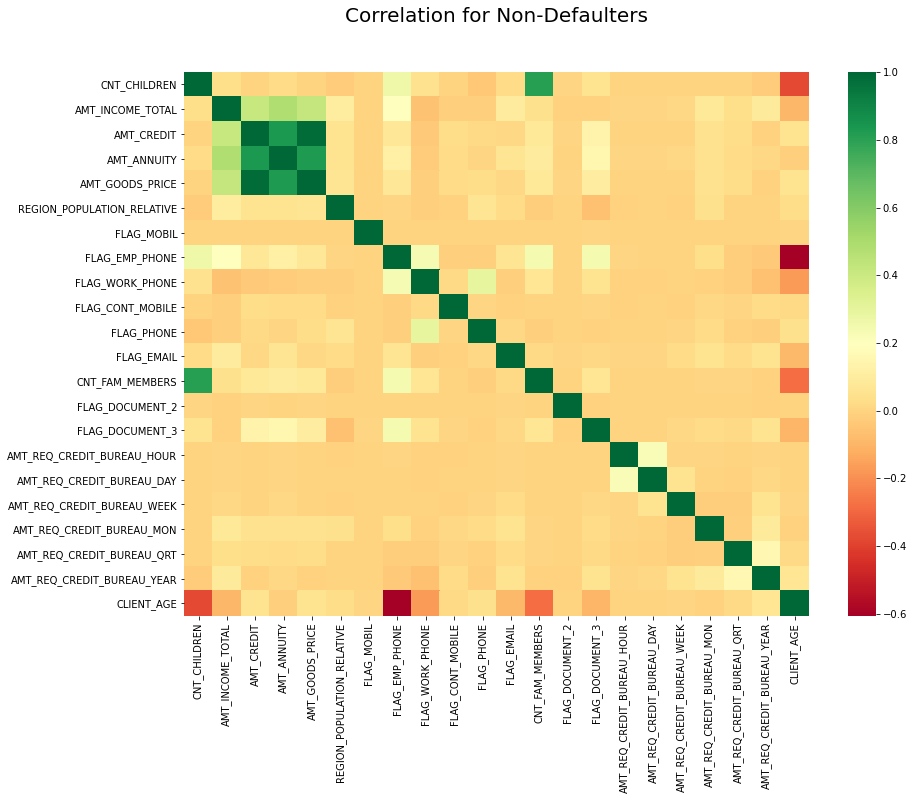

In [87]:
corr_heat(data=corr_non_def,title='Correlation for Non-Defaulters')

In [88]:
corr_def = defaulters_c.corr(method='spearman')

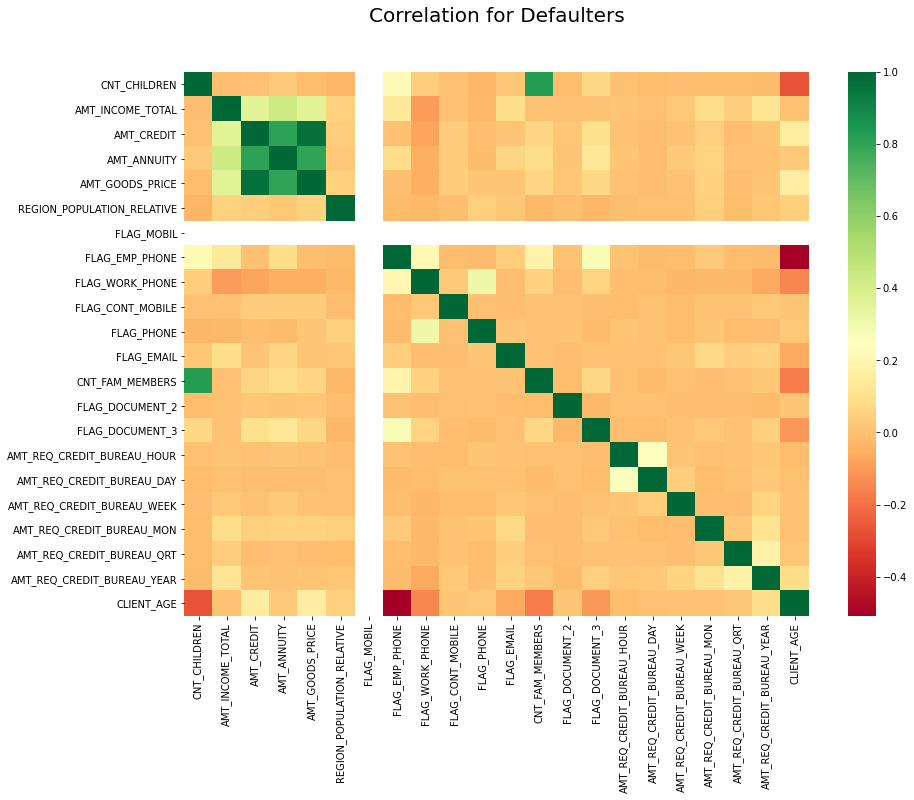

In [89]:
corr_heat(data=corr_def,title='Correlation for Defaulters')

##### Comments for  correlation:

- CLIENT_AGE and FLAG_EMP_PHONE are least correlated that some of the non-defaulters may not have phone number
- CLIENT_AGE and CNT_FAM_MEMBERS are least correlated that some of the clients are unmarried/single.
- CNT_FAM_MEMBERS and CNT_CHILDRED are correlated that if client have more family members it also states they have children.
- AMT_INCOME_TOTAL is correlated with AMT_CREDIT
- AMT_ANNUITY is correlated with AMT_INCOME_TOTAL, AMT_CREDIT
- AMT_GOODS_PRICE is correlated with AMT_ANNUITY, AMT_CREDIT

*Correlation for Defaulters and Non-Defaulters looks similar but most of the defaulters didn't provided the mobile number as we can see it in the second heat map*

### Analysis Previous application data

In [90]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
prev_appl.shape

(1670214, 37)

In [92]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [93]:
#Handling Missing data

(prev_appl.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [94]:
#Remove the variables with more than 35% missing value

null_feat_perc_prev = (prev_appl.isnull().mean()*100).sort_values(ascending=False)

In [95]:
prev_appl.drop(null_feat_perc_prev[null_feat_perc_prev > 35].index, axis=1, inplace=True)

In [96]:
#check null values again

(prev_appl.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

I am not imputing missing values in previous data

- Missing values in AMT_GOODS_PRICE, AMT_ANNUITY, AMT_CREDIT can be replaced with Median
- Missing values in CNT_PAYMENT, PRODUCT_COMBINATION can be replaced with Mode

In [97]:
prev_appl.AMT_CREDIT.value_counts()

0.000          336768
45000.000       35051
225000.000      21094
450000.000      19954
135000.000      18720
                ...  
747252.000          1
398827.980          1
1663515.000         1
37616.175           1
345766.500          1
Name: AMT_CREDIT, Length: 86803, dtype: int64

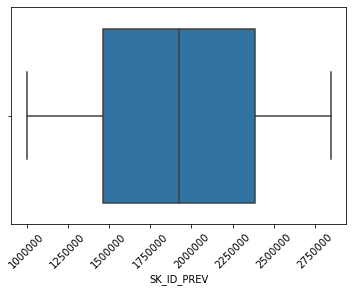

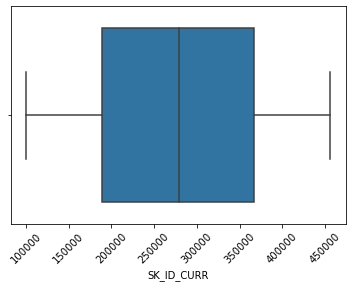

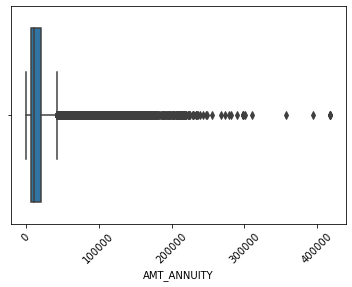

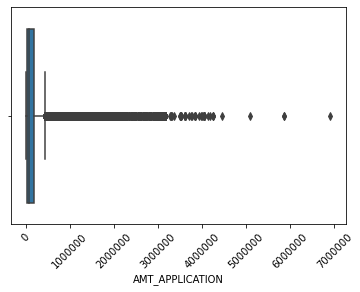

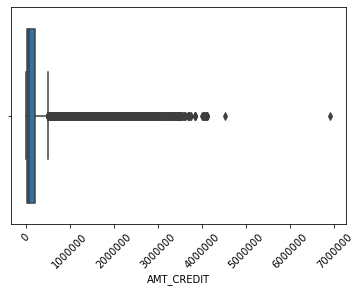

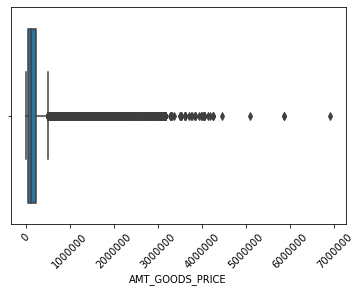

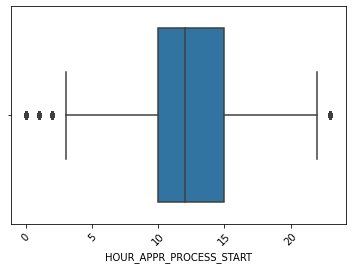

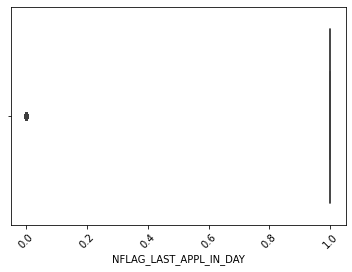

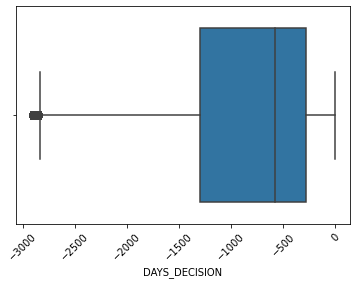

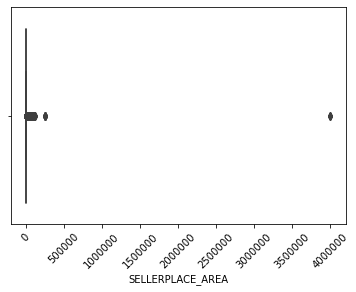

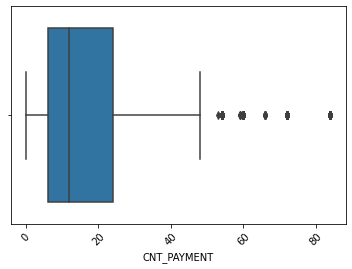

In [98]:
#outliers for all numeric cols

for col in prev_appl.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(prev_appl[col])
    plt.ticklabel_format(style = 'plain', axis='x') #to prevent income or similar variable to not showing in exp format in label
    plt.xticks(rotation=45)

##### Comments:

There are some continuous as well extreme outliers. 

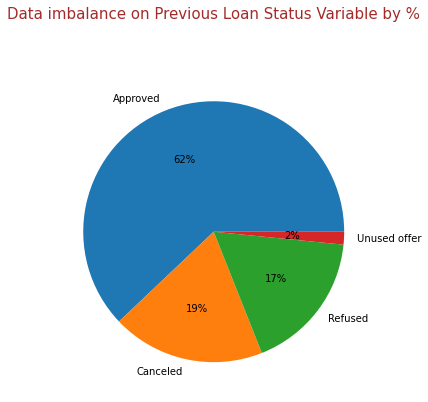

In [99]:
#Data Imbalance on targer variable NAME_CONTRACT_STATUS

plt.figure(figsize=(8,6))
prev_appl.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Data imbalance on Previous Loan Status Variable by %',fontdict={'fontsize': 15,'color':'Brown'})
plt.ylabel("")
plt.show()

In [100]:
#Univariate analysis on categorical variables

#NAME_CONTRACT_TYPE, WEEKDAY_APPR_PROCESS_START, 

cat_list = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE']

def cat_list_plot(feat):
    plt.figure(figsize=(14,6))
    sns.countplot(prev_appl[feat])
    plt.xticks(rotation=90)
    plt.show()

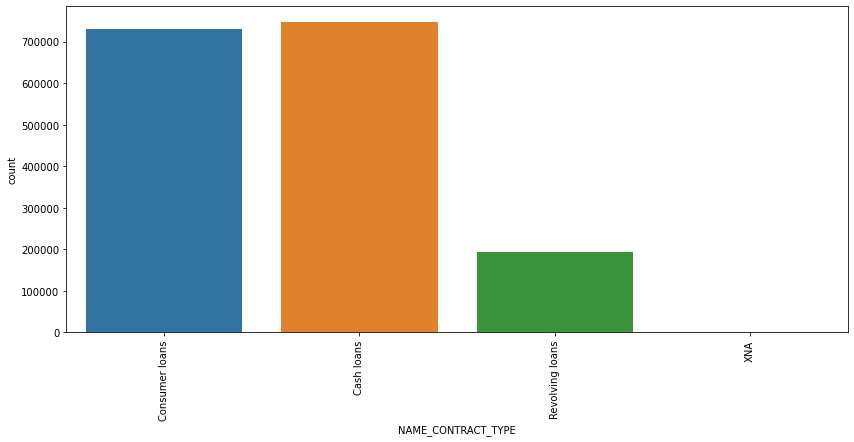

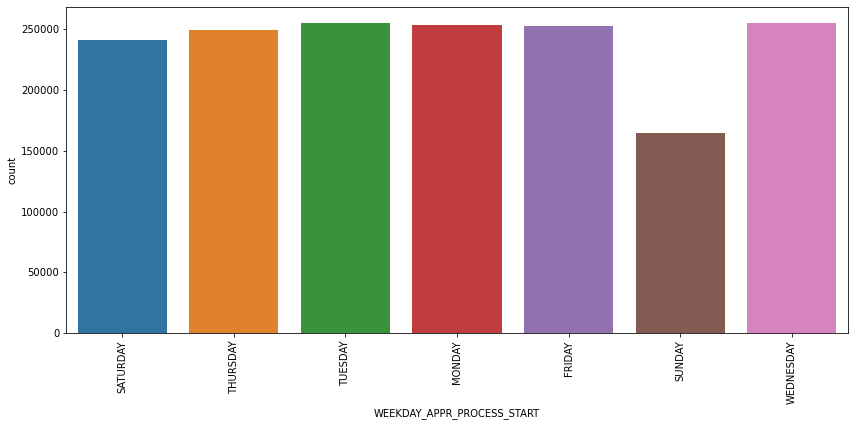

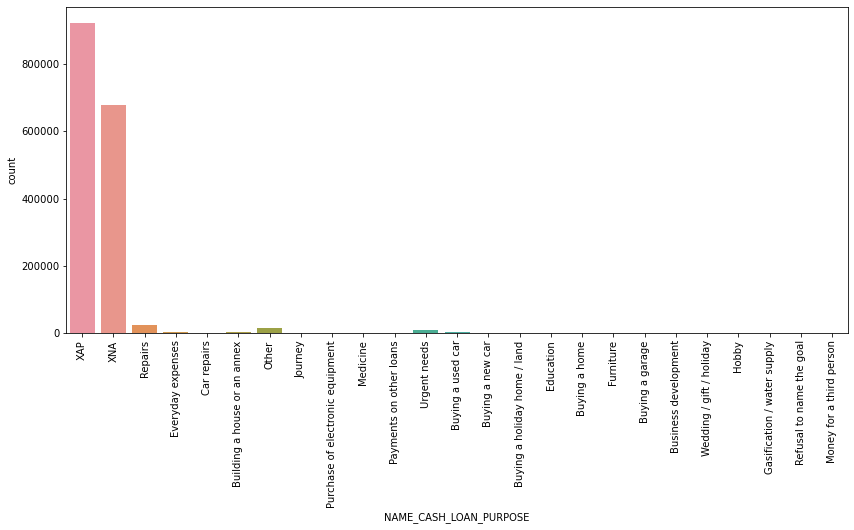

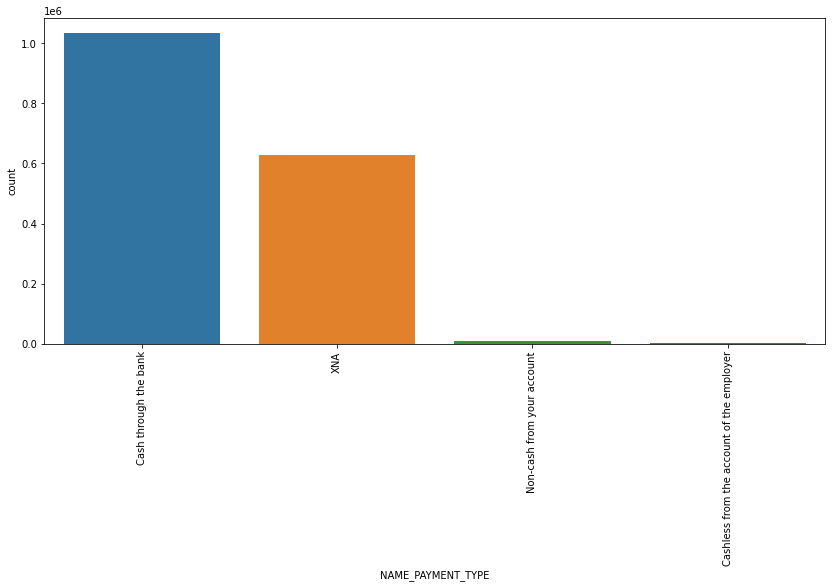

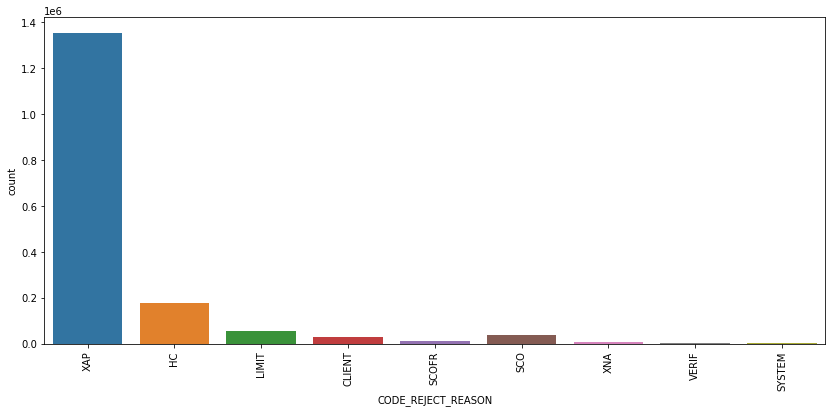

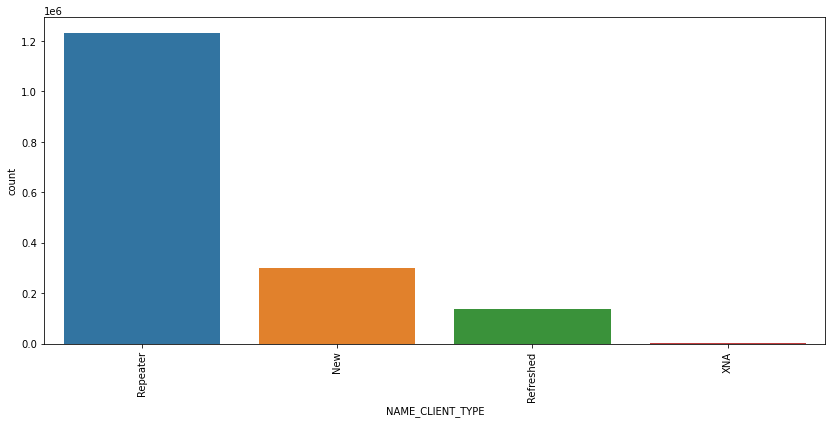

In [101]:
for v in cat_list:
    cat_list_plot(v)

##### Comments:

- Cash loans are mostly provided followed by Consumer and Revolving loans
- Most of the previous applications are filed on almost all workdays except Sunday
- It looks clients not provided the loan purpose as mostly it is XAP or XNA
- Previously provided loans are disbursed through cash from bank. XNA also states no data available
- Reject reason is also not available for most of previous loans as it is XAP
- Most of the loans are taken by existing clients only.

In [102]:
#Univariate on numerical data

#AMT_APPLICATION

prev_appl.AMT_APPLICATION.describe().apply(lambda x: format(x, 'f'))

count    1670214.000000
mean      175233.860360
std       292779.762387
min            0.000000
25%        18720.000000
50%        71046.000000
75%       180360.000000
max      6905160.000000
Name: AMT_APPLICATION, dtype: object

In [103]:
#AMT_CREDIT

prev_appl.AMT_CREDIT.describe().apply(lambda x: format(x, 'f'))

count    1670213.000000
mean      196114.021218
std       318574.616546
min            0.000000
25%        24160.500000
50%        80541.000000
75%       216418.500000
max      6905160.000000
Name: AMT_CREDIT, dtype: object

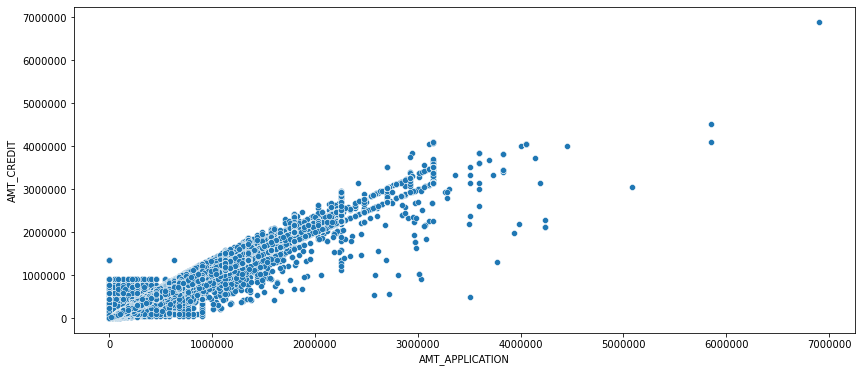

In [104]:
#bivariate analysis

#AMT_APPLICATION vs AMT_CREDIT

plt.figure(figsize=(14,6))
sns.scatterplot(data=prev_appl, x='AMT_APPLICATION',y='AMT_CREDIT')
plt.ticklabel_format(style = 'plain')
plt.show()

##### Comments:

As seen above, somewhat the plot is linear that if the application amount increases the credit amount also increases. Some outliers shows if the credit is lower than amount application.

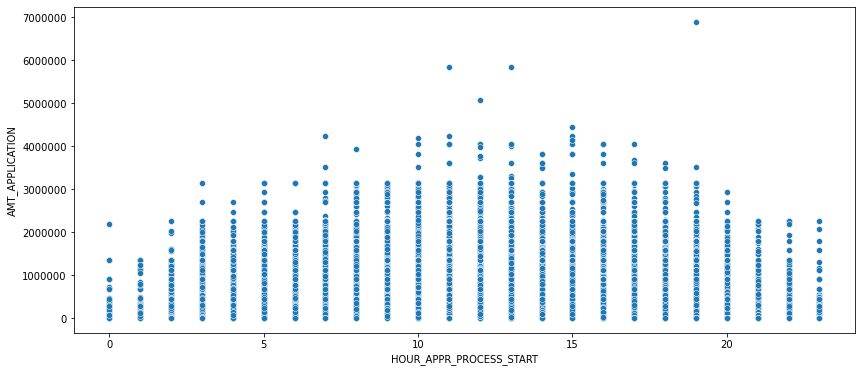

In [111]:
#HOUR_APPR_PROCESS_START vs AMT_APPLICATION

plt.figure(figsize=(14,6))
sns.scatterplot(data=prev_appl,x='HOUR_APPR_PROCESS_START',y='AMT_APPLICATION')
plt.ticklabel_format(style = 'plain',axis='y')
plt.show()

##### Comments:

Almost all the hours in a day the client applied the loans and it scatters across the loan amount applied. Also it looks most of the higher amounts are applied in from hour 5 to 19 (approx)

In [143]:
#Numerical variable segemented univariate analysis on target NAME_CONTRACT_STATUS

num_feat_prev = appl_data.select_dtypes(include=np.number).columns

def num_uni_plot_prev(feat):
    plt.figure(figsize=(14,8))
    
    plt.subplot(2,2,1)
    sns.distplot(prev_appl[prev_appl.NAME_CONTRACT_STATUS=='Approved'][feat],kde=False, color='green')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Approved', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=45)
    
    plt.subplot(2,2,2)
    sns.distplot(prev_appl[prev_appl.NAME_CONTRACT_STATUS=='Canceled'][feat], kde=False, color='red')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Canceled', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=45)
    
     
    plt.subplot(2,2,3)
    sns.distplot(prev_appl[prev_appl.NAME_CONTRACT_STATUS=='Refused'][feat], kde=False, color='yellow')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Refused', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=45)
    
    plt.subplot(2,2,4)
    sns.distplot(prev_appl[prev_appl.NAME_CONTRACT_STATUS=='Unused offer'][feat], kde=False, color='blue')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Unused offer', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=45)

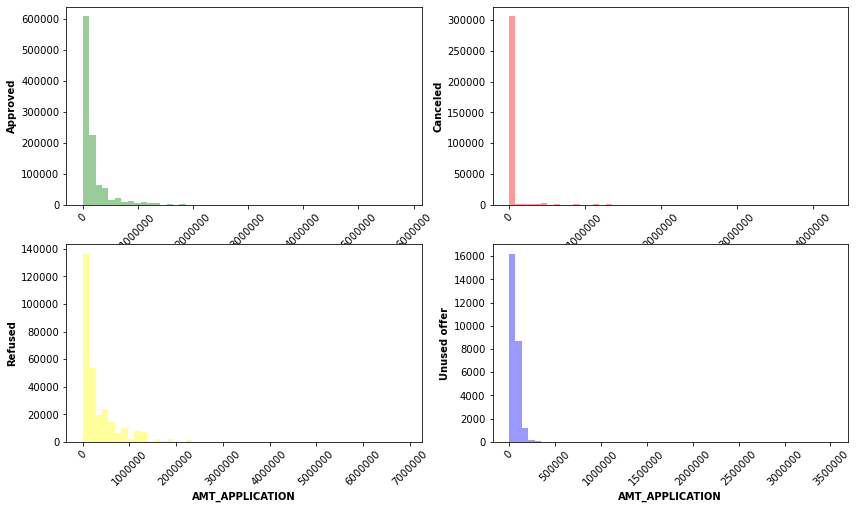

In [144]:
num_uni_plot_prev('AMT_APPLICATION')

##### Comments:

- Mostly the application less than 10 lakhs as cancelled.
- There are some approved, cancelled and unused loans above 10 lakhs.
- Loans that are unused are below 5 lakhs

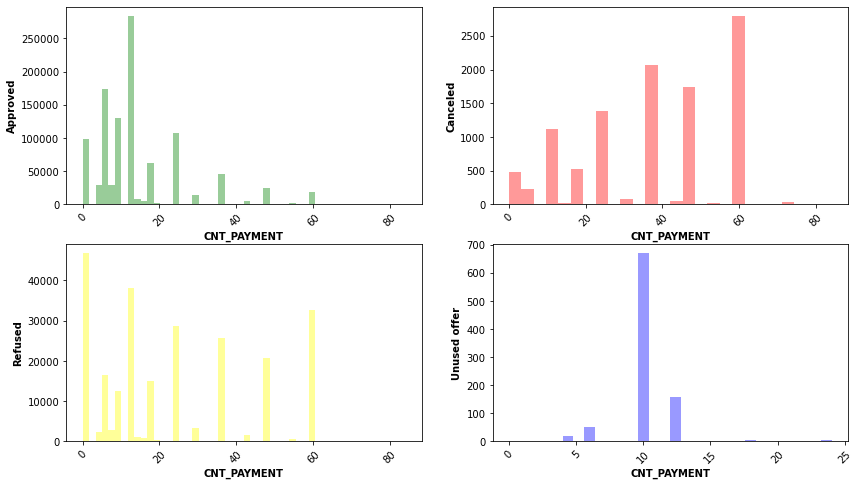

In [151]:
num_uni_plot_prev('CNT_PAYMENT')

##### Comments:

- Canceled loans are having higher tenure of previous credits
- Approved loans are mostly within 20 tenure of previous credits
- Refused loans spread across tenures upto 60
- Unused offeres are mostly tenure with 10

#### Merging two data frames previous application and current application

In [161]:
prev_appl_curr_target=pd.merge(left=appl_data,right=prev_appl,how='inner',on='SK_ID_CURR')

In [162]:
prev_appl_curr_target.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [163]:
prev_appl_curr_target.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 102 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [159]:
def num_uni_plot_both(feat):
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    sns.distplot(prev_appl_curr_target[prev_appl_curr_target.TARGET==0][feat],kde=False, color='green')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Non-Defaulters', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.distplot(prev_appl_curr_target[prev_appl_curr_target.TARGET==1][feat], kde=False, color='red')
    plt.xlabel(feat, fontsize= 10, fontweight="bold")
    plt.ylabel('Defaulters', fontsize= 10, fontweight="bold")
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation=90)

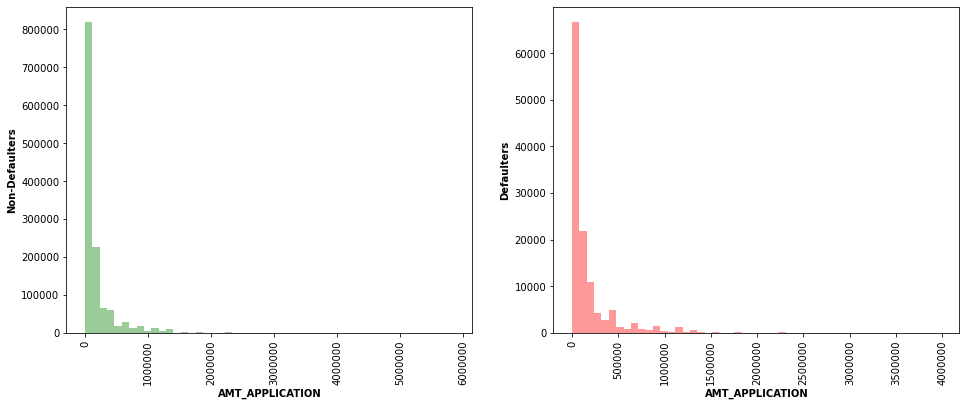

In [160]:
#AMT_APPLICATION vs TARGET

num_uni_plot_both('AMT_APPLICATION')

##### Comments:

Most of the defaulters are applied loan below 500000

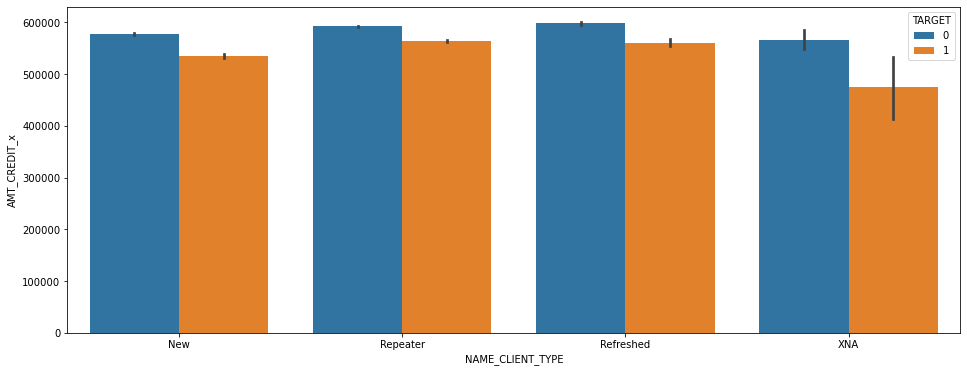

In [167]:
#NAME_CLIENT_TYPE vs Previous AMT_CREDIT on TARGET

plt.figure(figsize=(16,6))
sns.barplot(data=prev_appl_curr_target,x='NAME_CLIENT_TYPE', y='AMT_CREDIT_x',hue='TARGET')
plt.show()

##### Comments:

- Defaulters are mainly the repeater or refresher
- Also the repeater and refresher are non-defaulters as well

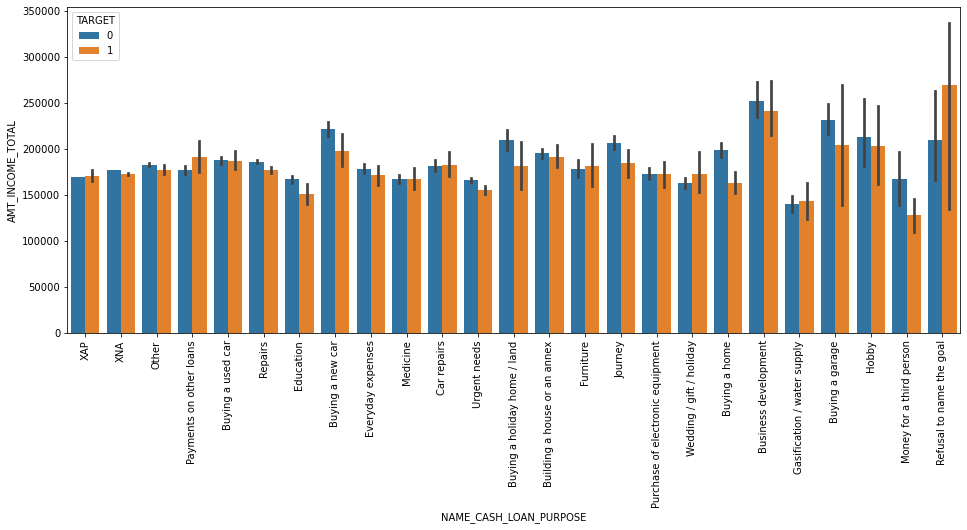

In [174]:
#CODE_REJECT_REASON vs AMT_INCOME_TOTAL on target

plt.figure(figsize=(16,6))
sns.barplot(data=prev_appl_curr_target,x='NAME_CASH_LOAN_PURPOSE', y='AMT_INCOME_TOTAL',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

##### Comments:

- The main defaulters are who refuse to provide the purpose for the loan
- Clients who opt loan for Business Development likely to non-defaulters as well as defaulters.
- The loan provided for Payments on other loans and car repairs are also results in defaults